# *Topic : Kaggle, Income Dataset*
### *Dataset Source*
https://www.kaggle.com/datasets/mastmustu/income
### *Code Reference*
https://www.kaggle.com/code/iamsouravbanerjee/shopping-trends-unveiled-eda-for-beginners

## *Data Check*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [2]:
df1 = pd.read_csv("C:/Users/user/Downloads/Income Dataset/train.csv")
df1.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   67    Private  366425     Doctorate               16            Divorced   
1   17    Private  244602          12th                8       Never-married   
2   31    Private  174201     Bachelors               13  Married-civ-spouse   
3   58  State-gov  110199       7th-8th                4  Married-civ-spouse   
4   25  State-gov  149248  Some-college               10       Never-married   

         occupation   relationship   race gender  capital-gain  capital-loss  \
0   Exec-managerial  Not-in-family  White   Male         99999             0   
1     Other-service      Own-child  White   Male             0             0   
2   Exec-managerial        Husband  White   Male             0             0   
3  Transport-moving        Husband  White   Male             0             0   
4     Other-service  Not-in-family  Black   Male             0             0   

   hours-per-week native-country  income_>50K  
0              60  United-States            1  
1              15  United-States            0  
2              40  United-States            1  
3              40  United-States            0  
4              40  United-States            0

In [3]:
df2 = pd.read_csv("C:/Users/user/Downloads/Income Dataset/test.csv")
df2.head()

age         workclass  fnlwgt   education  educational-num  \
0   39  Self-emp-not-inc  327120     HS-grad                9   
1   32           Private  123253  Assoc-acdm               12   
2   47           Private  232628     HS-grad                9   
3   19           Private  374262        12th                8   
4   46  Self-emp-not-inc  311231     HS-grad                9   

       marital-status         occupation relationship   race gender  \
0  Married-civ-spouse       Craft-repair      Husband  White   Male   
1  Married-civ-spouse       Craft-repair      Husband  White   Male   
2  Married-civ-spouse       Craft-repair      Husband  Black   Male   
3       Never-married  Handlers-cleaners    Own-child  White   Male   
4  Married-civ-spouse    Farming-fishing      Husband  White   Male   

   capital-gain  capital-loss  hours-per-week native-country  
0             0             0              40       Portugal  
1             0             0              42  United-States  
2             0             0              40  United-States  
3             0             0              20  United-States  
4             0             0              40  United-States

In [4]:
df = pd.concat([df1, df2])
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   67    Private  366425     Doctorate               16            Divorced   
1   17    Private  244602          12th                8       Never-married   
2   31    Private  174201     Bachelors               13  Married-civ-spouse   
3   58  State-gov  110199       7th-8th                4  Married-civ-spouse   
4   25  State-gov  149248  Some-college               10       Never-married   

         occupation   relationship   race gender  capital-gain  capital-loss  \
0   Exec-managerial  Not-in-family  White   Male         99999             0   
1     Other-service      Own-child  White   Male             0             0   
2   Exec-managerial        Husband  White   Male             0             0   
3  Transport-moving        Husband  White   Male             0             0   
4     Other-service  Not-in-family  Black   Male             0             0   

   hours-per-week native-country  income_>50K  
0              60  United-States          1.0  
1              15  United-States          0.0  
2              40  United-States          1.0  
3              40  United-States          0.0  
4              40  United-States          0.0

In [5]:
df.shape

(44856, 15)

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

### *Columns Description*

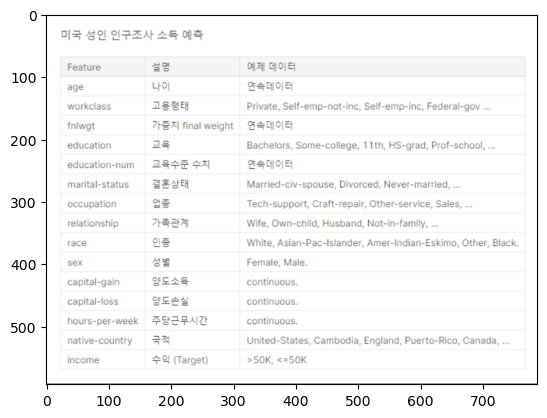

In [7]:
import matplotlib.image as img

img_test = img.imread('C:/Users/user/OneDrive/바탕 화면/Major/데이터처리프로그래밍/img/columns_description.png')
plt.imshow(img_test)
plt.grid(False)
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44856 entries, 0 to 898
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              44856 non-null  int64  
 1   workclass        42358 non-null  object 
 2   fnlwgt           44856 non-null  int64  
 3   education        44856 non-null  object 
 4   educational-num  44856 non-null  int64  
 5   marital-status   44856 non-null  object 
 6   occupation       42350 non-null  object 
 7   relationship     44856 non-null  object 
 8   race             44856 non-null  object 
 9   gender           44856 non-null  object 
 10  capital-gain     44856 non-null  int64  
 11  capital-loss     44856 non-null  int64  
 12  hours-per-week   44856 non-null  int64  
 13  native-country   44093 non-null  object 
 14  income_>50K      43957 non-null  float64
dtypes: float64(1), int64(6), object(8)
memory usage: 5.5+ MB


In [9]:
df.describe()

age        fnlwgt  educational-num  capital-gain  \
count  44856.000000  4.485600e+04     44856.000000  44856.000000   
mean      38.616328  1.897627e+05        10.076355   1086.251583   
std       13.721436  1.058047e+05         2.573193   7519.761299   
min       17.000000  1.349200e+04         1.000000      0.000000   
25%       28.000000  1.175288e+05         9.000000      0.000000   
50%       37.000000  1.782110e+05        10.000000      0.000000   
75%       48.000000  2.377540e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week   income_>50K  
count  44856.000000    44856.000000  43957.000000  
mean      88.721152       40.421995      0.239279  
std      405.401776       12.400502      0.426648  
min        0.000000        1.000000      0.000000  
25%        0.000000       40.000000      0.000000  
50%        0.000000       40.000000      0.000000  
75%        0.000000       45.000000      0.000000  
max     4356.000000       99.000000      1.000000

## *Data Cleaning*

### *Remove missing value*

In [10]:
df.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K         899
dtype: int64

In [11]:
# 결측치를 최빈값으로 대체

df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)
df['income_>50K'].fillna(df['income_>50K'].mode()[0], inplace=True)

In [12]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [13]:
df.shape

(44856, 15)

### *Remove duplicated value*

In [14]:
df.duplicated().sum()

46

In [15]:
df[df.duplicated()].head()

age workclass  fnlwgt     education  educational-num  \
1650    29   Private   41281     Bachelors               13   
6915    19   Private  251579  Some-college               10   
8362    19   Private  318822       HS-grad                9   
12669   22   Private  137876  Some-college               10   
13408   39   Private  184659       HS-grad                9   

              marital-status         occupation   relationship   race  gender  \
1650   Married-spouse-absent       Craft-repair  Not-in-family  White    Male   
6915           Never-married      Other-service      Own-child  White    Male   
8362           Never-married       Adm-clerical  Not-in-family  White  Female   
12669          Never-married    Protective-serv  Not-in-family  White    Male   
13408     Married-civ-spouse  Machine-op-inspct        Husband  White    Male   

       capital-gain  capital-loss  hours-per-week native-country  income_>50K  
1650              0             0              50  United-States          0.0  
6915              0             0              14  United-States          0.0  
8362              0             0              40  United-States          0.0  
12669             0             0              20  United-States          0.0  
13408             0             0              40  United-States          0.0

In [16]:
df.drop_duplicates(inplace=True)
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   67    Private  366425     Doctorate               16            Divorced   
1   17    Private  244602          12th                8       Never-married   
2   31    Private  174201     Bachelors               13  Married-civ-spouse   
3   58  State-gov  110199       7th-8th                4  Married-civ-spouse   
4   25  State-gov  149248  Some-college               10       Never-married   

         occupation   relationship   race gender  capital-gain  capital-loss  \
0   Exec-managerial  Not-in-family  White   Male         99999             0   
1     Other-service      Own-child  White   Male             0             0   
2   Exec-managerial        Husband  White   Male             0             0   
3  Transport-moving        Husband  White   Male             0             0   
4     Other-service  Not-in-family  Black   Male             0             0   

   hours-per-week native-country  income_>50K  
0              60  United-States          1.0  
1              15  United-States          0.0  
2              40  United-States          1.0  
3              40  United-States          0.0  
4              40  United-States          0.0

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(44810, 15)

### *Check outlier*

In [19]:
# boxplot을 이용하여 outlier 확인

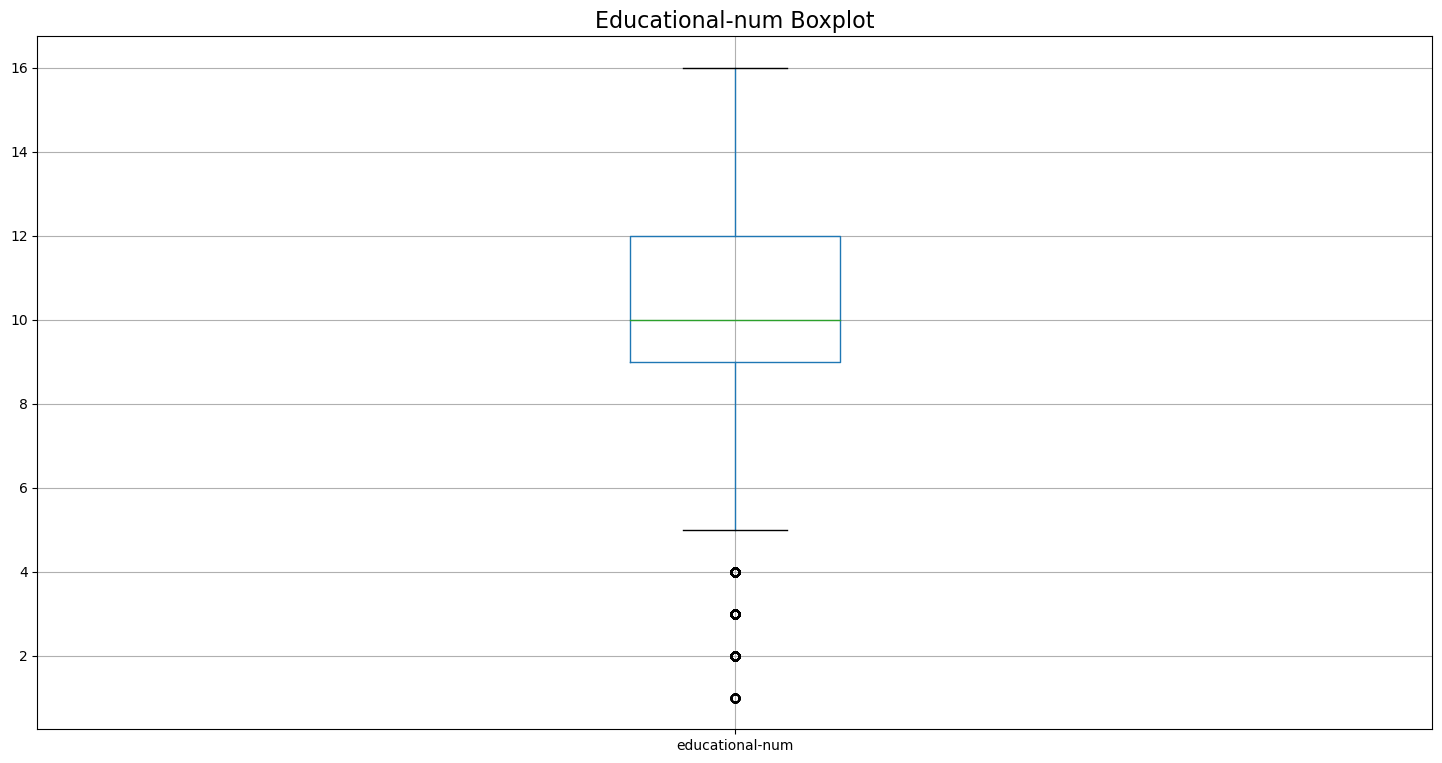

In [20]:
num_cols = ['educational-num']
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Educational-num Boxplot", fontsize=16)
plt.show()

In [21]:
# educational-num 최소값, 최대값, 평균값

print("Min : ",  df['educational-num'].min())
print("Max : ",  df['educational-num'].max())
print("Mean : ", df['educational-num'].mean())

Min :  1
Max :  16
Mean :  10.077393438964517


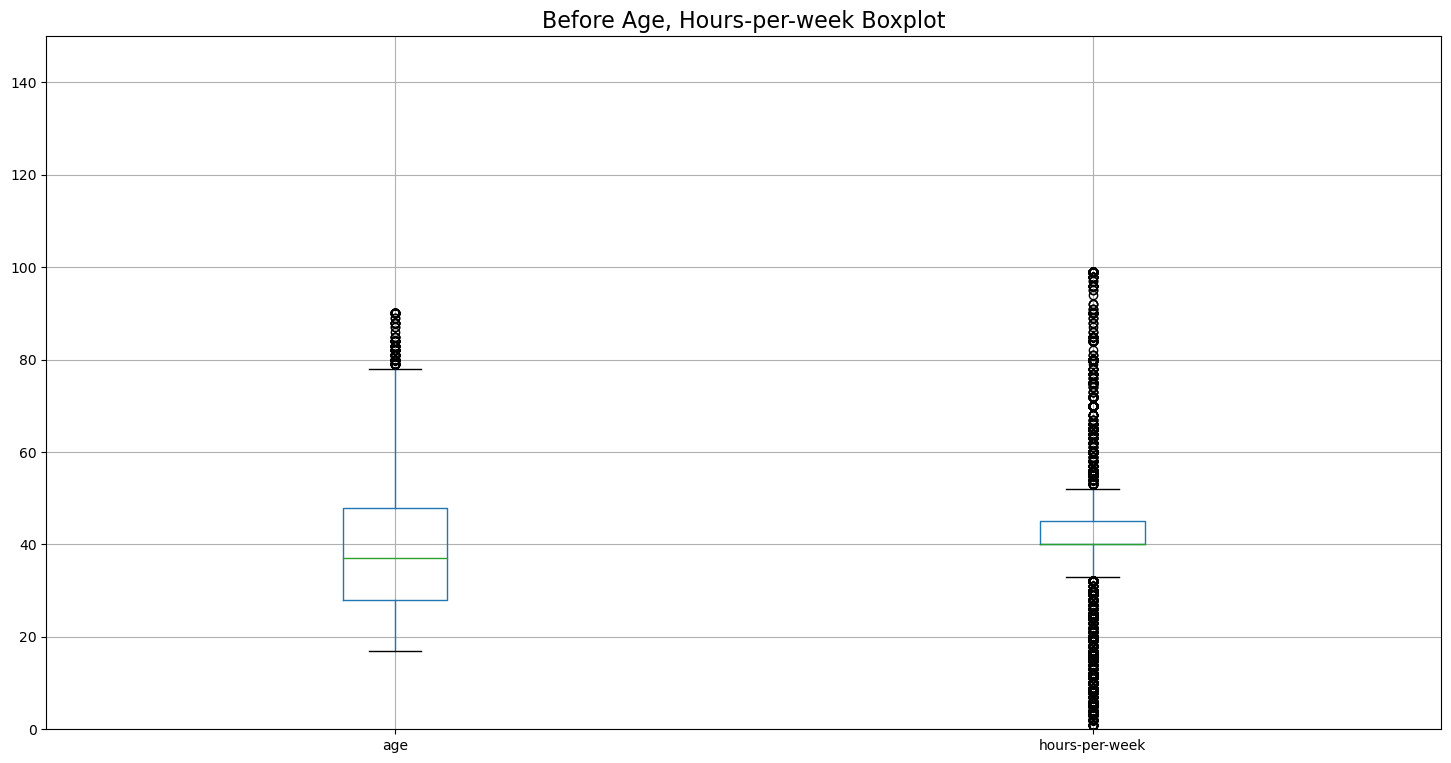

In [22]:
num_cols = ['age', 'hours-per-week']
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.ylim(0, 150)
plt.title("Before Age, Hours-per-week Boxplot", fontsize=16)
plt.show()

In [23]:
# age, hours-per-week 최소값, 최대값, 평균값, 최빈값
print("-----------------------------")
print("Age")
print("-----------------------------")
print("Min : ",  df['age'].min())
print("Max : ",  df['age'].max())
print("Mean : ", df['age'].mean())
print("-----------------------------")
print("Hours-per-week")
print("-----------------------------")
print("Min : ", df['hours-per-week'].min())
print("Max : ", df['hours-per-week'].max())
print("Mean : ", df['hours-per-week'].mean())
print("Mode : ", df['hours-per-week'].mode())
print("-----------------------------")

-----------------------------
Age
-----------------------------
Min :  17
Max :  90
Mean :  38.62517295246597
-----------------------------
Hours-per-week
-----------------------------
Min :  1
Max :  99
Mean :  40.425306851149294
Mode :  0    40
Name: hours-per-week, dtype: int64
-----------------------------


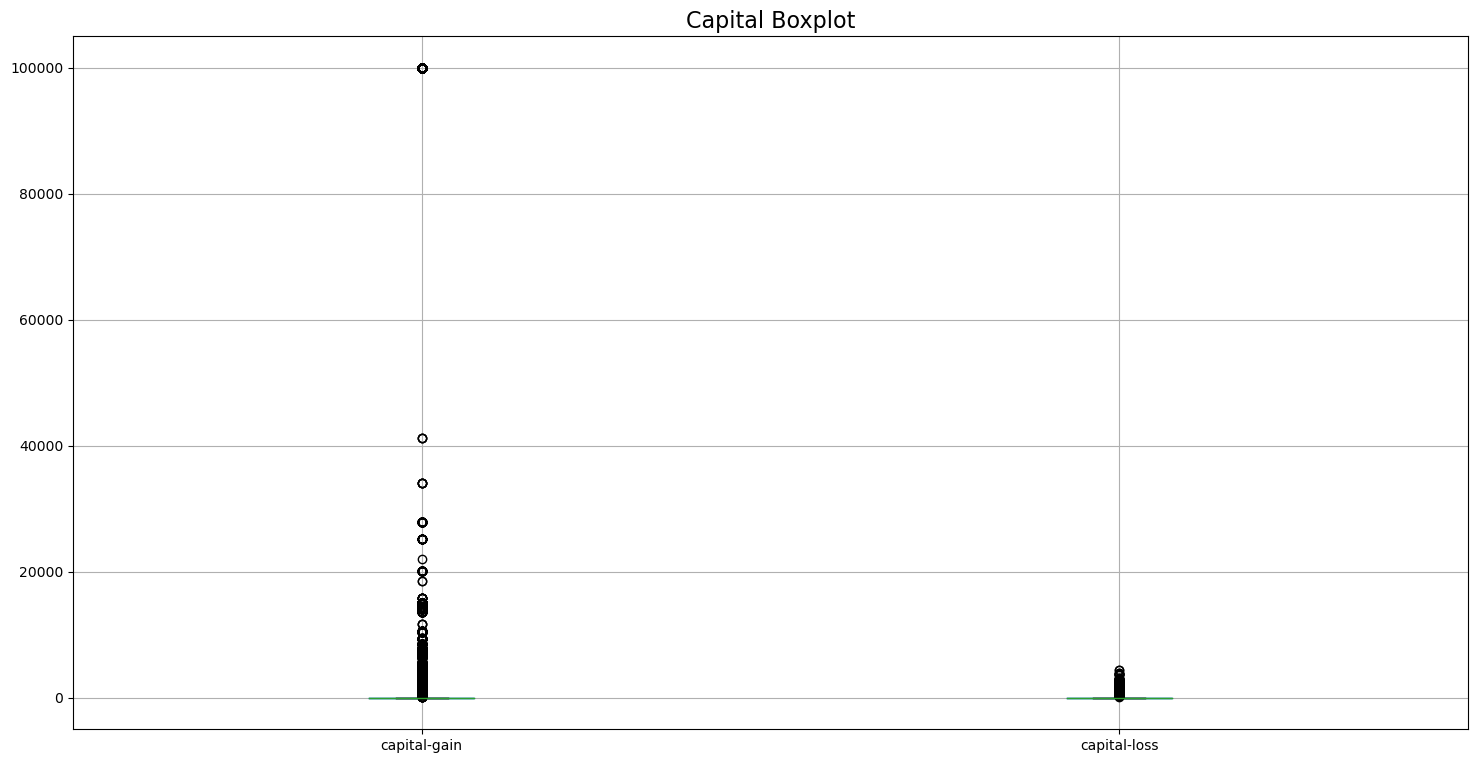

In [24]:
num_cols = ['capital-gain', 'capital-loss']
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Capital Boxplot", fontsize=16)
plt.show()

## *EDA (Data Visualizing)*

### *Lable Check*

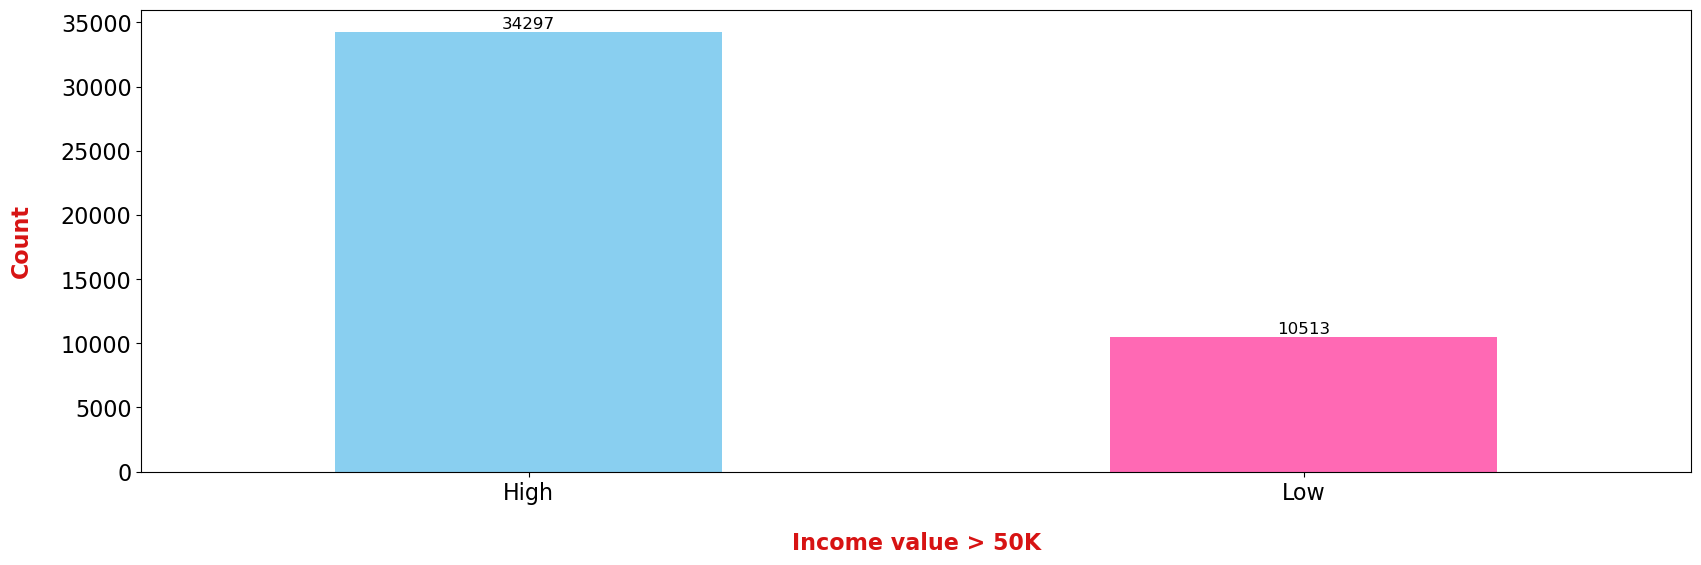

In [25]:
# Income_>50K(label) count

plt.figure(figsize = (20, 6))
ax = df['income_>50K'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('High', 'Low'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black', fontsize=12)
    ax.tick_params(axis = 'both', labelsize = 16)
plt.xlabel('Income value > 50K', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20);

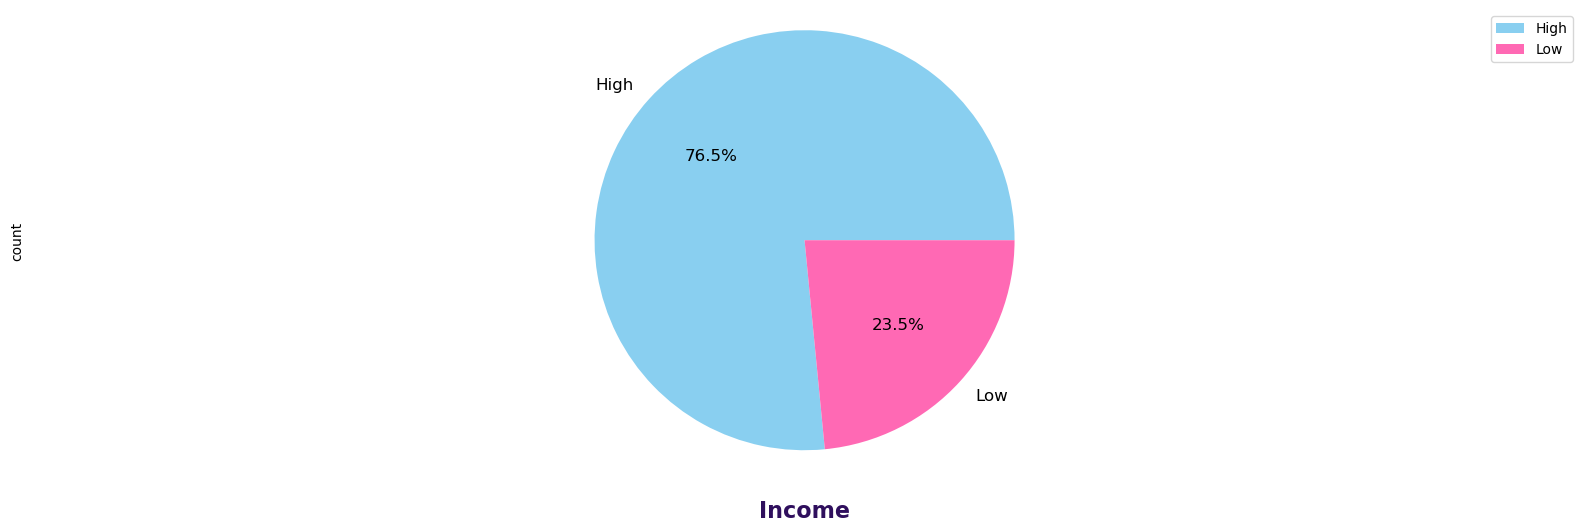

In [26]:
# Income rate

plt.figure(figsize = (20, 6))

counts = df["income_>50K"].map({0: 'High', 1: 'Low'}).value_counts()
explode = (0.0, 0.0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Income', weight = "bold", color = "#2F0F5D", fontsize = 16, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

### *Gender*

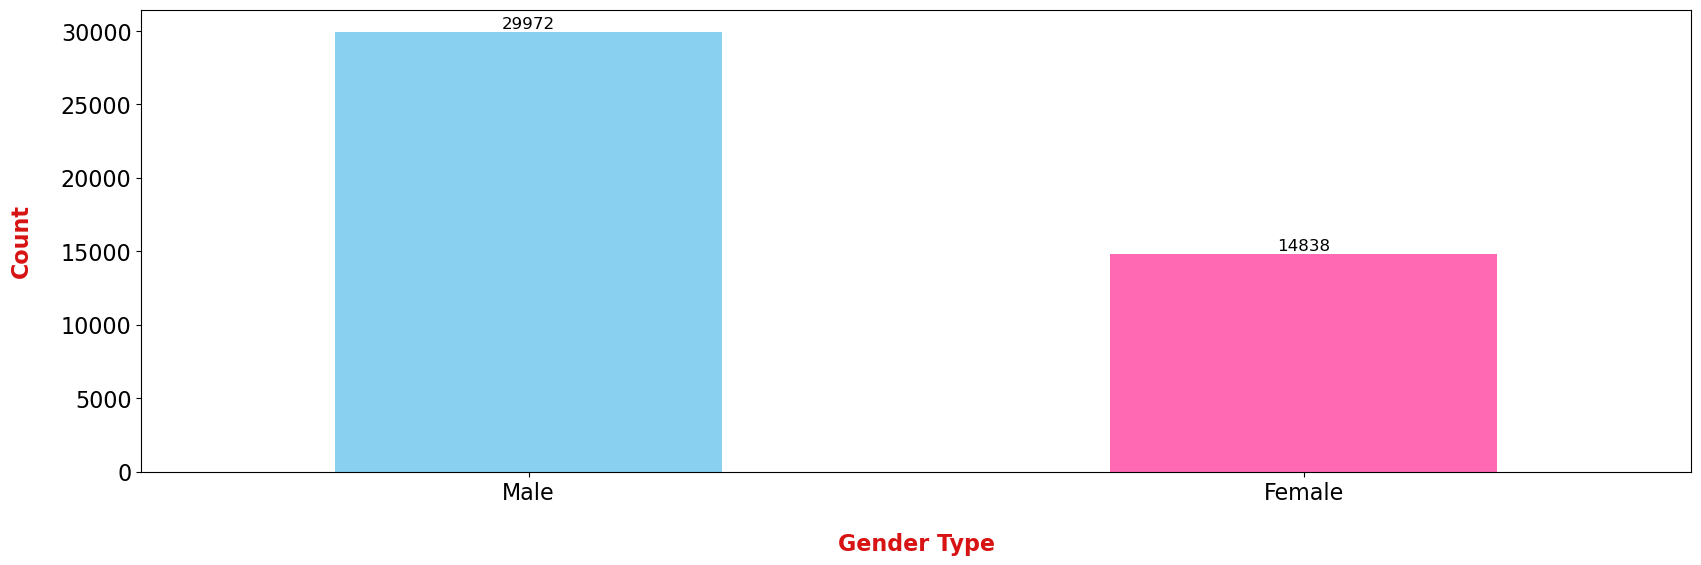

In [27]:
# Gender count

plt.figure(figsize = (20, 6))
ax = df['gender'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black', fontsize=12)
    ax.tick_params(axis = 'both', labelsize = 16)
plt.xlabel('Gender Type', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20);

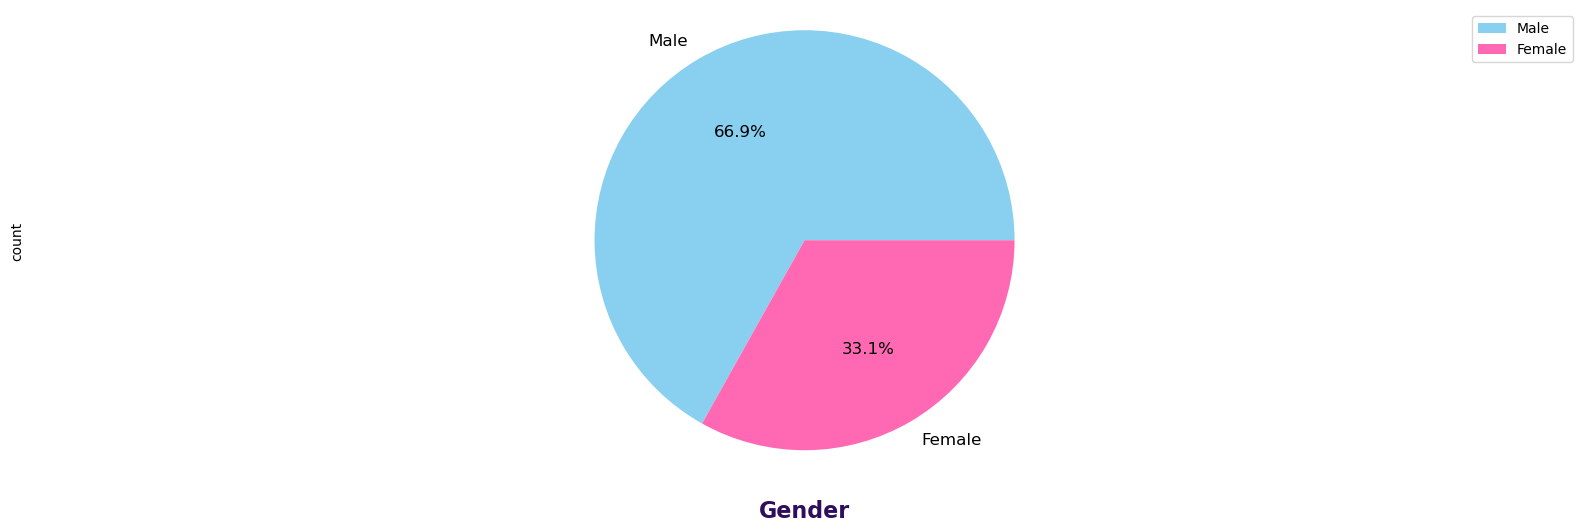

In [28]:
# Gender rate

plt.figure(figsize = (20, 6))

counts = df["gender"].value_counts()
explode = (0.0, 0.0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 16, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

### *Race*

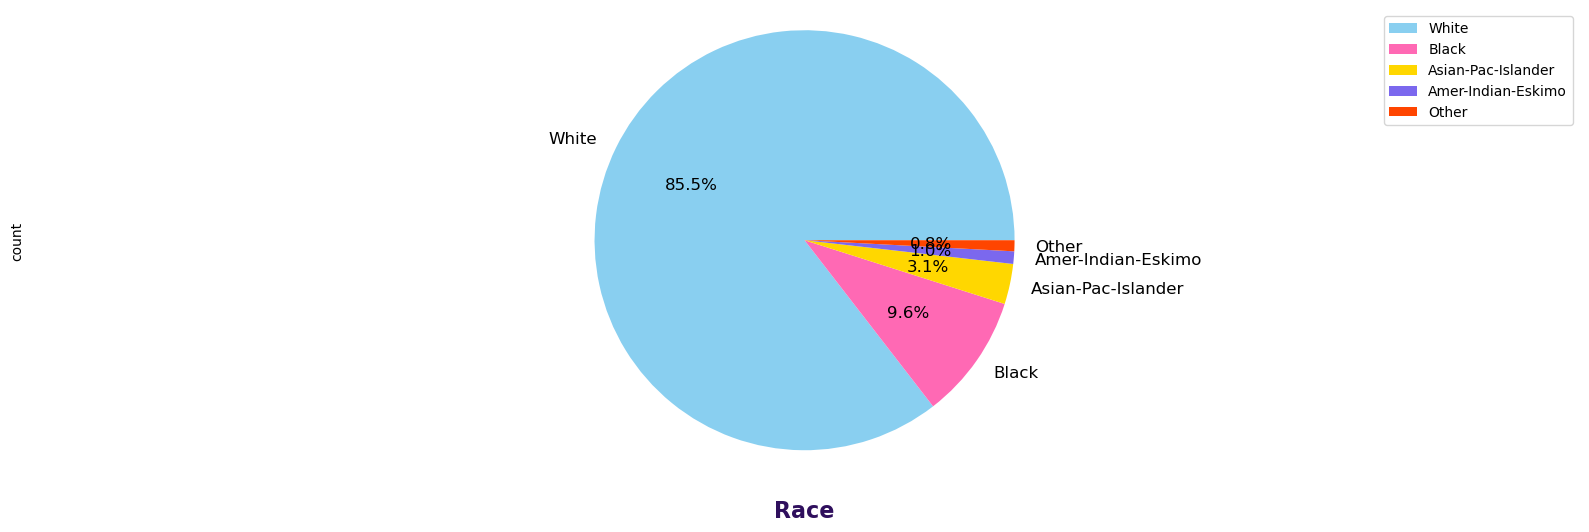

In [29]:
# Race rate

plt.figure(figsize = (20, 6))

counts = df["race"].value_counts()
explode = (0.0, 0.0, 0.0, 0.0, 0.0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Race', weight = "bold", color = "#2F0F5D", fontsize = 16, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

### *Relationship*

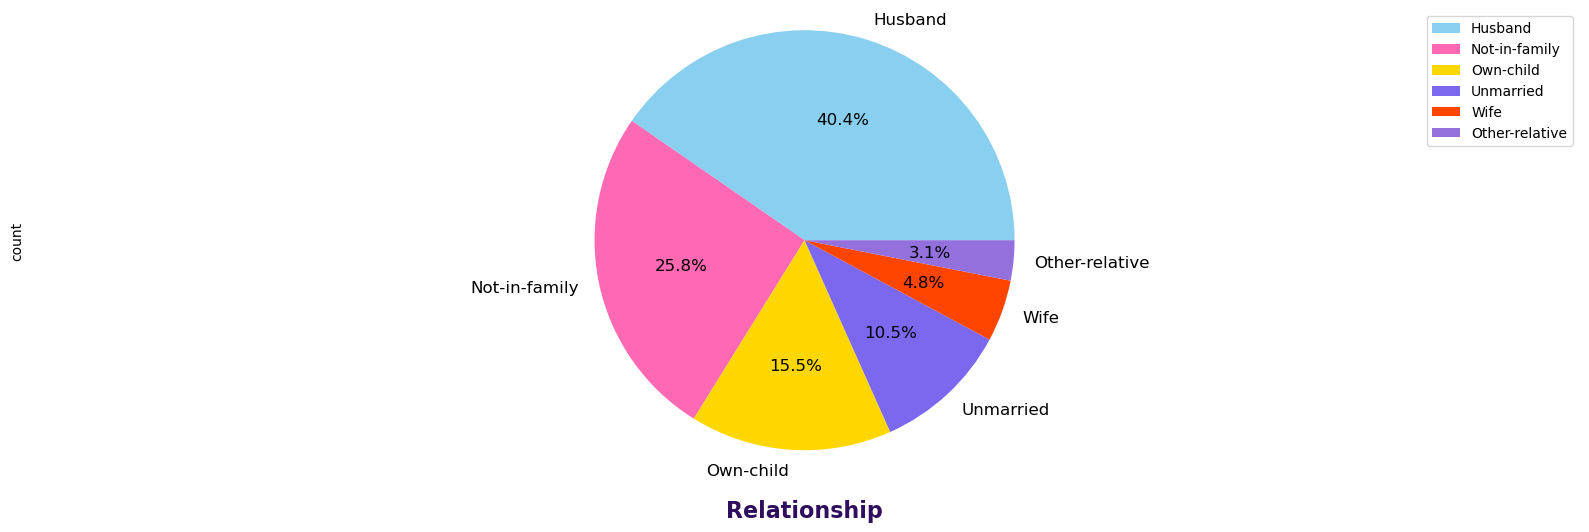

In [30]:
# Relationship rate

plt.figure(figsize = (20, 6))

counts = df["relationship"].value_counts()
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Relationship', weight = "bold", color = "#2F0F5D", fontsize = 16, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

### *Marital Status*

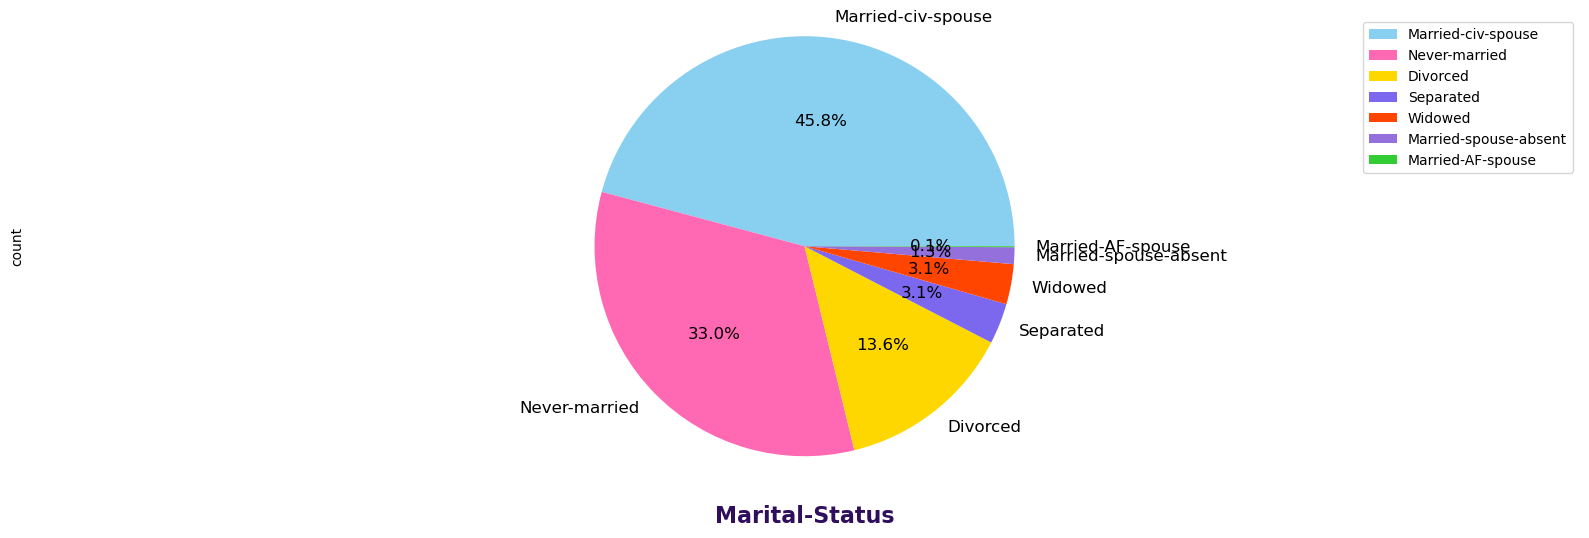

In [31]:
# Marital rate

plt.figure(figsize = (20, 6))

counts = df["marital-status"].value_counts()
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Marital-Status', weight = "bold", color = "#2F0F5D", fontsize = 16, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

### *Education*

In [32]:
df['education'].unique()

array(['Doctorate', '12th', 'Bachelors', '7th-8th', 'Some-college',
       'HS-grad', '9th', '10th', '11th', 'Masters', 'Preschool',
       '5th-6th', 'Prof-school', 'Assoc-voc', '1st-4th', 'Assoc-acdm'],
      dtype=object)

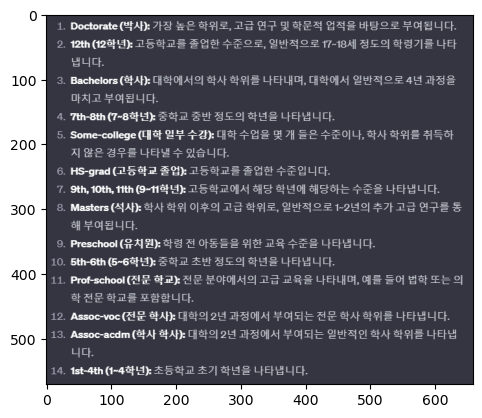

In [33]:
import matplotlib.image as img

img_test = img.imread('C:/Users/user/OneDrive/바탕 화면/Major/데이터처리프로그래밍/img/education.png')
plt.imshow(img_test)
plt.grid(False)
plt.show()

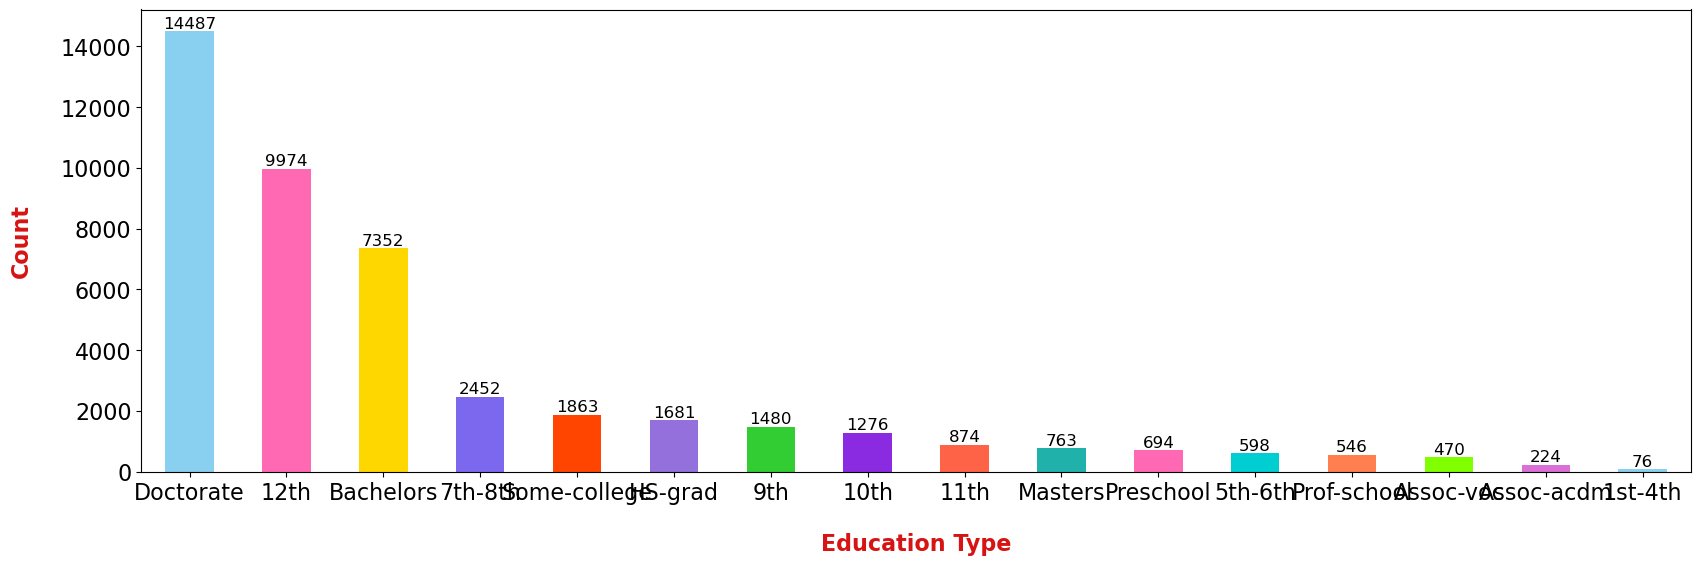

In [34]:
# Education count

plt.figure(figsize = (20, 6))
ax = df['education'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Doctorate', '12th', 'Bachelors', '7th-8th', 'Some-college',
                    'HS-grad', '9th', '10th', '11th', 'Masters', 'Preschool',
                    '5th-6th', 'Prof-school', 'Assoc-voc', 'Assoc-acdm', '1st-4th'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black', fontsize=12)
    ax.tick_params(axis = 'both', labelsize = 16)
plt.xlabel('Education Type', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20);

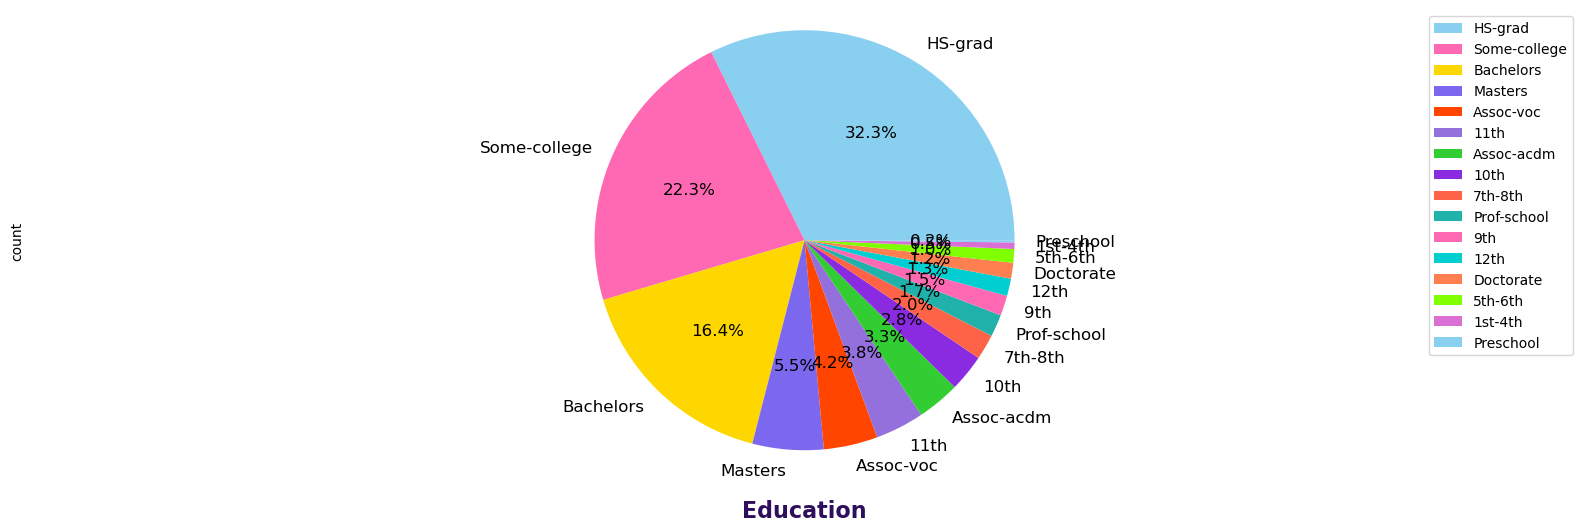

In [35]:
# Education rate

plt.figure(figsize = (20, 6))

counts = df["education"].value_counts()
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Education', weight = "bold", color = "#2F0F5D", fontsize = 16, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

### *Occupation*

In [36]:
df['occupation'].unique()

array(['Exec-managerial', 'Other-service', 'Transport-moving',
       'Adm-clerical', 'Machine-op-inspct', 'Sales', 'Handlers-cleaners',
       'Farming-fishing', 'Protective-serv', 'Prof-specialty',
       'Craft-repair', 'Tech-support', 'Priv-house-serv', 'Armed-Forces'],
      dtype=object)

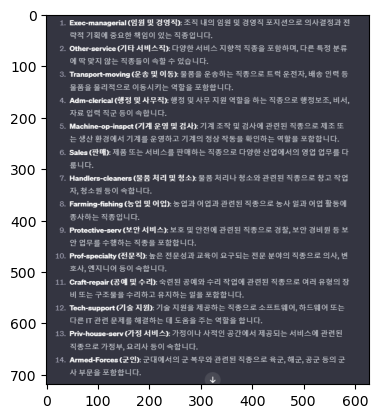

In [37]:
import matplotlib.image as img

img_test = img.imread('C:/Users/user/OneDrive/바탕 화면/Major/데이터처리프로그래밍/img/occupation.png')
plt.imshow(img_test)
plt.grid(False)
plt.show()

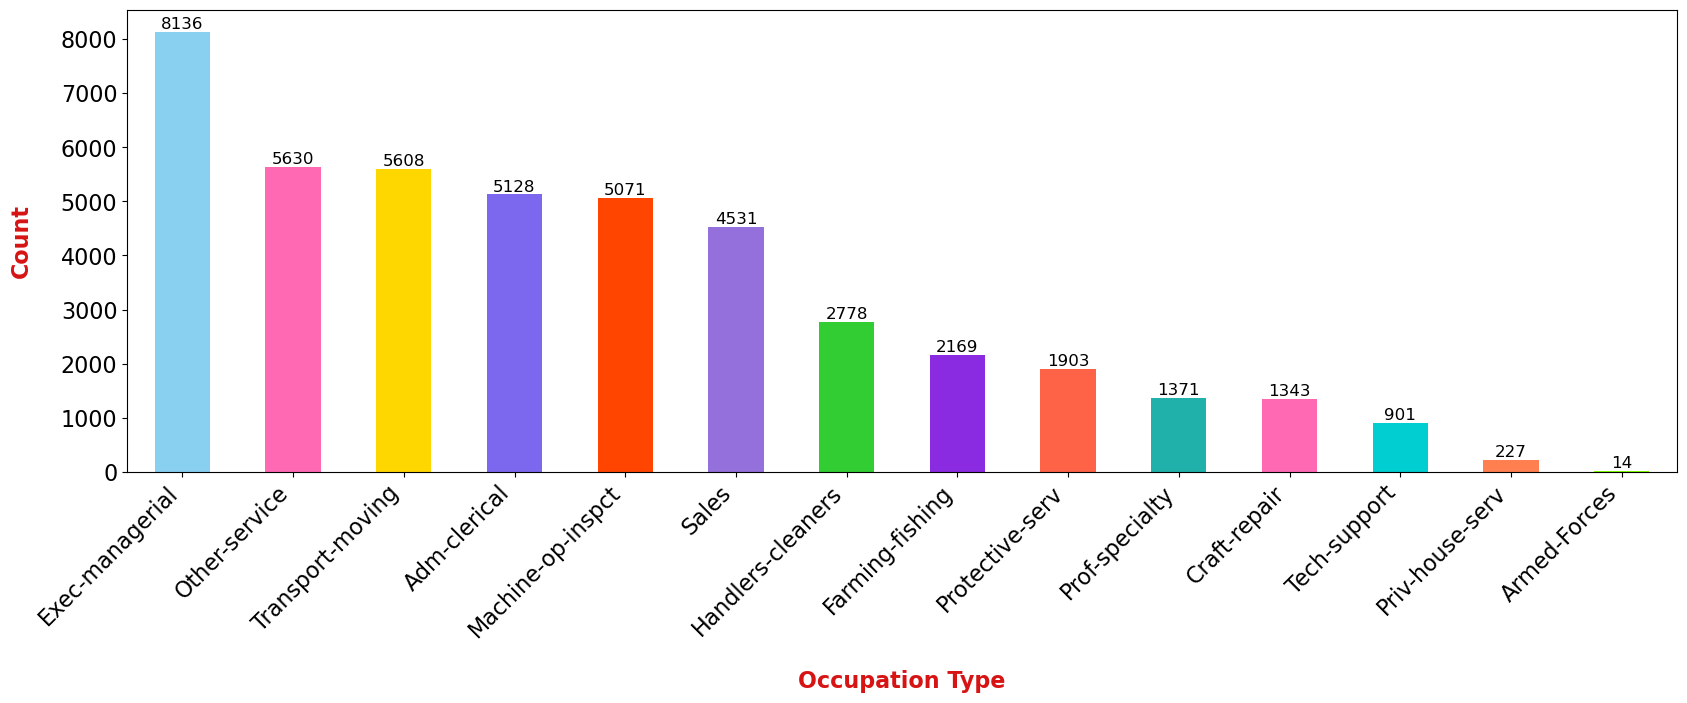

In [38]:
# Occupation count

plt.figure(figsize = (20, 6))
ax = df['occupation'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Exec-managerial', 'Other-service', 'Transport-moving' ,'Adm-clerical', 
                    'Machine-op-inspct', 'Sales', 'Handlers-cleaners', 'Farming-fishing', 
                    'Protective-serv', 'Prof-specialty', 'Craft-repair', 'Tech-support', 'Priv-house-serv', 'Armed-Forces'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black', fontsize=12)
    ax.tick_params(axis = 'both', labelsize = 16)
plt.xlabel('Occupation Type', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20);

plt.xticks(rotation=45, ha='right')
plt.show()

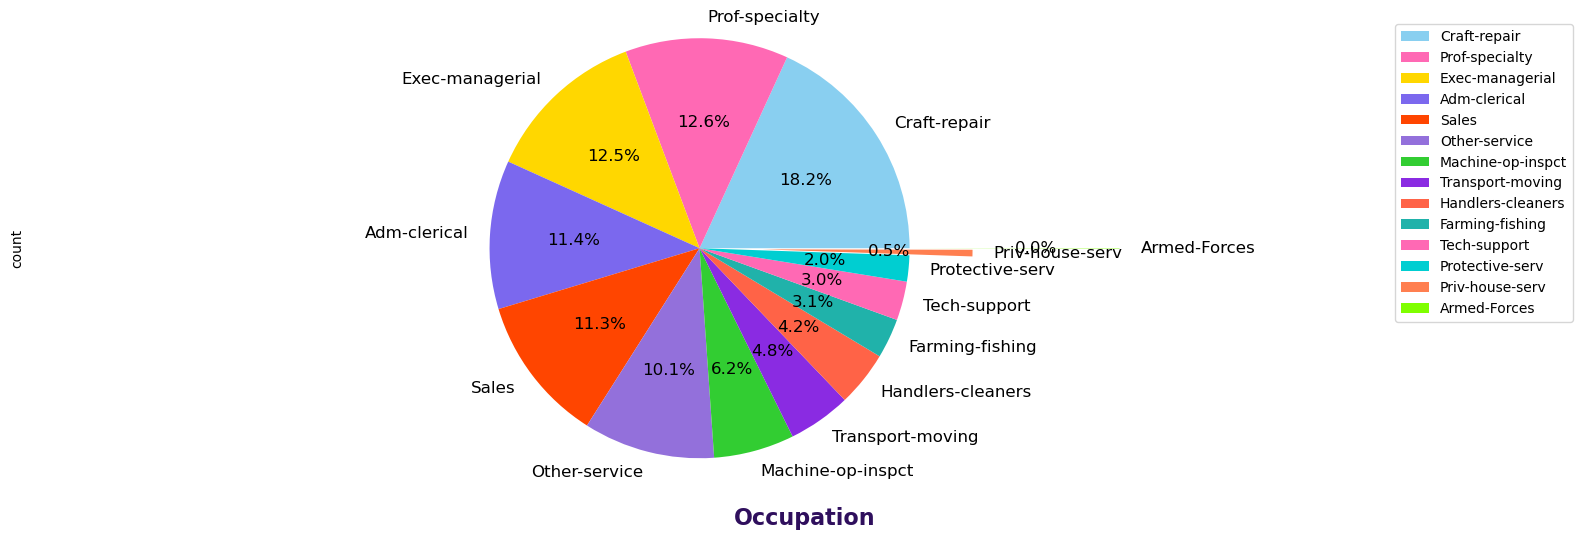

In [39]:
# Occupation rate

plt.figure(figsize = (20, 6))

counts = df["occupation"].value_counts()
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 1.0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Occupation', weight = "bold", color = "#2F0F5D", fontsize = 16, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

### *Native Country*

In [40]:
df['native-country'].unique()

array(['United-States', 'Japan', 'South', 'Portugal', 'Italy', 'Mexico',
       'Ecuador', 'England', 'Philippines', 'China', 'Germany',
       'Dominican-Republic', 'Jamaica', 'Vietnam', 'Thailand',
       'Puerto-Rico', 'Cuba', 'India', 'Cambodia', 'Yugoslavia', 'Iran',
       'El-Salvador', 'Poland', 'Greece', 'Ireland', 'Canada',
       'Guatemala', 'Scotland', 'Columbia', 'Outlying-US(Guam-USVI-etc)',
       'Haiti', 'Peru', 'Nicaragua', 'Taiwan', 'France',
       'Trinadad&Tobago', 'Laos', 'Hungary', 'Honduras', 'Hong',
       'Holand-Netherlands'], dtype=object)

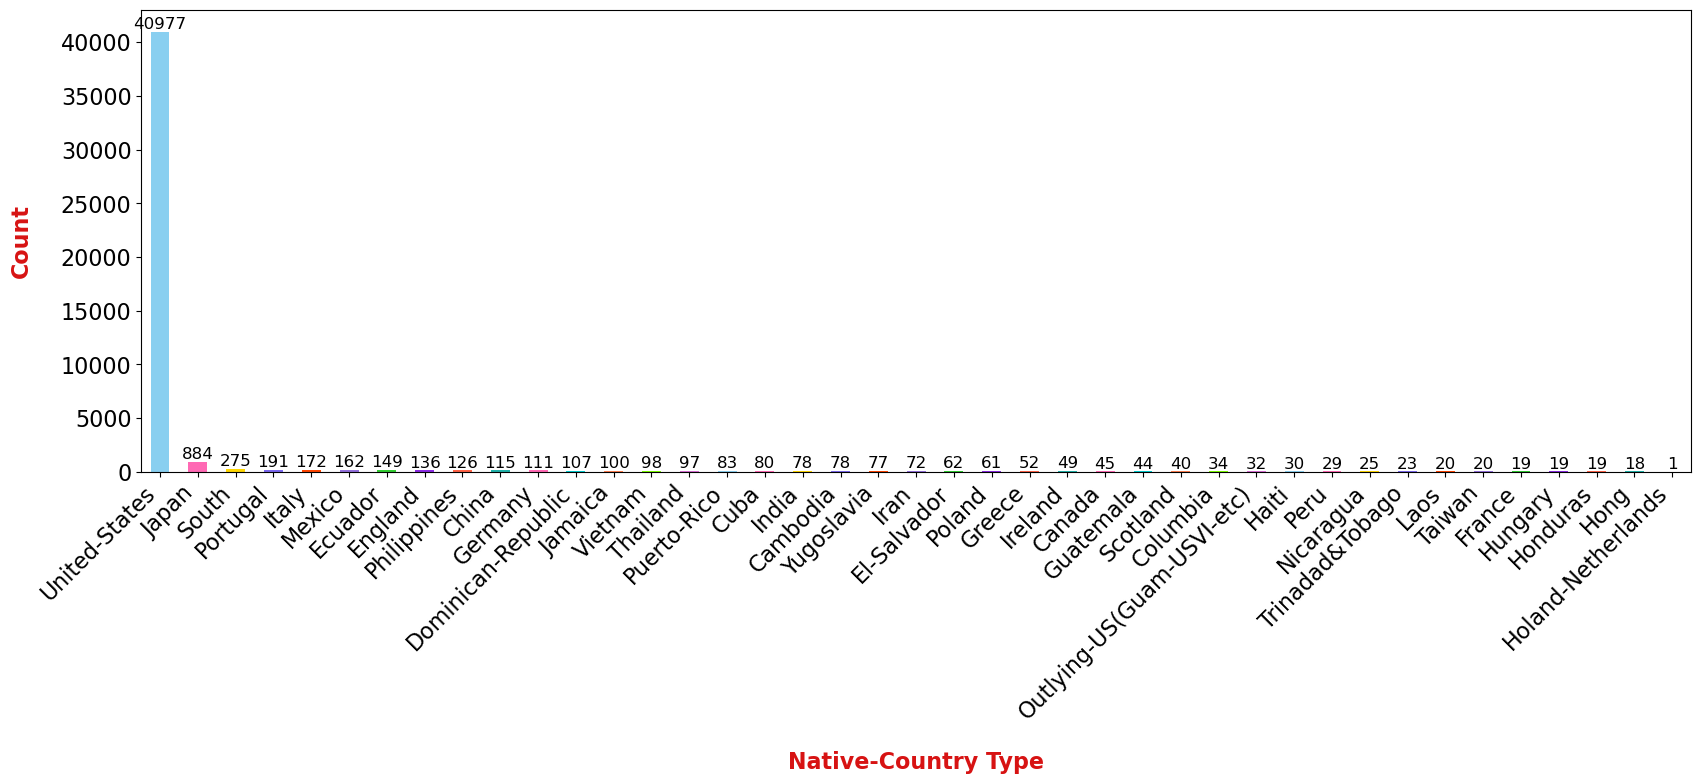

In [41]:
# Native-Country count

plt.figure(figsize = (20, 6))
ax = df['native-country'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('United-States', 'Japan', 'South', 'Portugal', 'Italy', 'Mexico',
                    'Ecuador', 'England', 'Philippines', 'China', 'Germany',
                    'Dominican-Republic', 'Jamaica', 'Vietnam', 'Thailand',
                    'Puerto-Rico', 'Cuba', 'India', 'Cambodia', 'Yugoslavia', 'Iran',
                    'El-Salvador', 'Poland', 'Greece', 'Ireland', 'Canada',
                    'Guatemala', 'Scotland', 'Columbia', 'Outlying-US(Guam-USVI-etc)',
                    'Haiti', 'Peru', 'Nicaragua', 'Trinadad&Tobago', 'Laos', 'Taiwan',
                    'France', 'Hungary', 'Honduras', 'Hong', 'Holand-Netherlands'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black', fontsize=12)
    ax.tick_params(axis = 'both', labelsize = 16)
plt.xlabel('Native-Country Type', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20);

plt.xticks(rotation=45, ha='right')
plt.show()

### *Workclass*

In [42]:
df["workclass"].value_counts()

workclass
Private             33670
Self-emp-not-inc     3548
Local-gov            2890
State-gov            1799
Self-emp-inc         1562
Federal-gov          1313
Without-pay            20
Never-worked            8
Name: count, dtype: int64

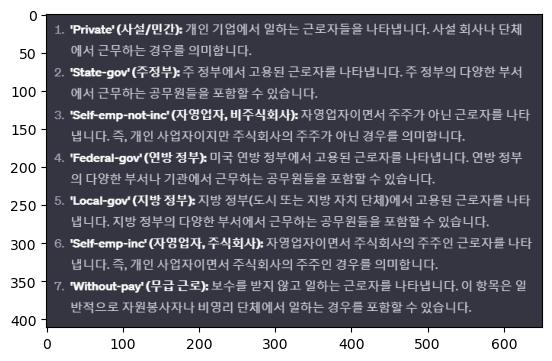

In [43]:
import matplotlib.image as img

img_test = img.imread('C:/Users/user/OneDrive/바탕 화면/Major/데이터처리프로그래밍/img/workclass.png')
plt.imshow(img_test)
plt.grid(False)
plt.show()

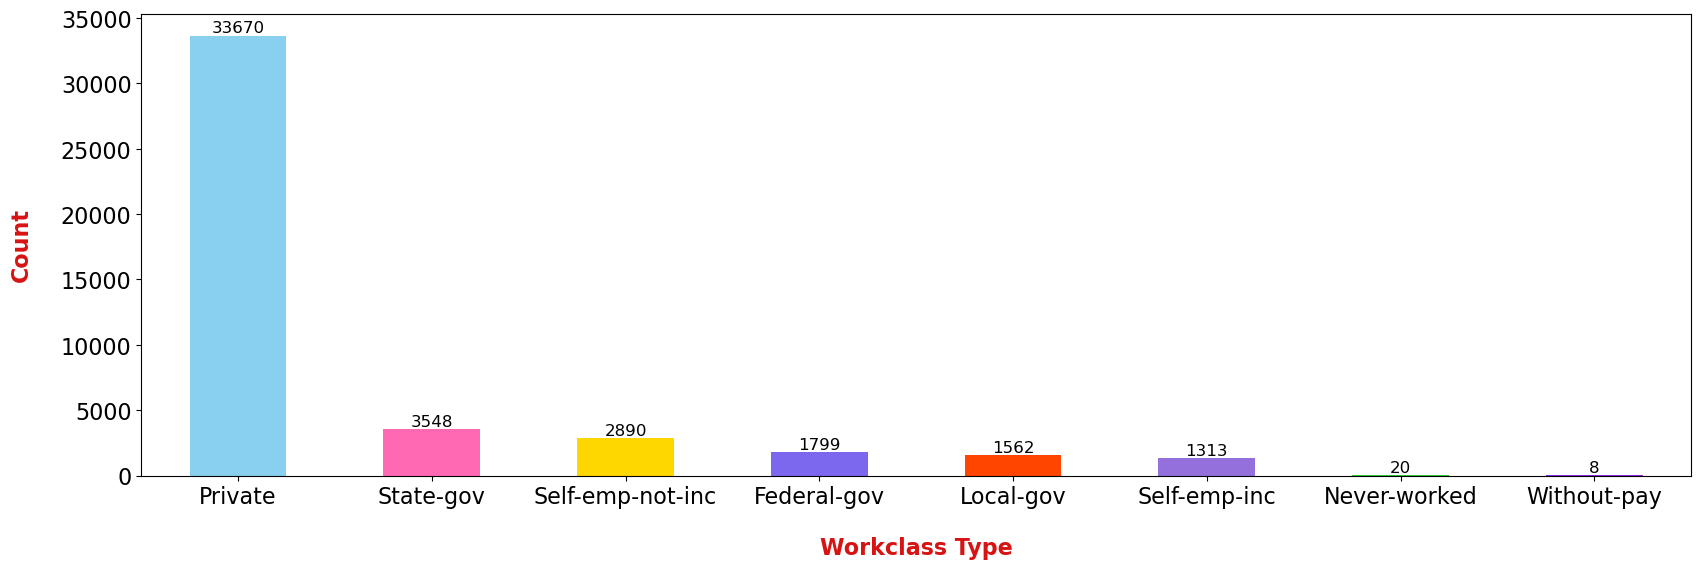

In [44]:
# workclass count

plt.figure(figsize = (20, 6))
ax = df["workclass"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Private', 'State-gov', 'Self-emp-not-inc', 'Federal-gov',
                    'Local-gov', 'Self-emp-inc', 'Never-worked', 'Without-pay'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black', fontsize=12)
    ax.tick_params(axis = 'both', labelsize = 16)
plt.xlabel('Workclass Type', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 16, labelpad = 20);

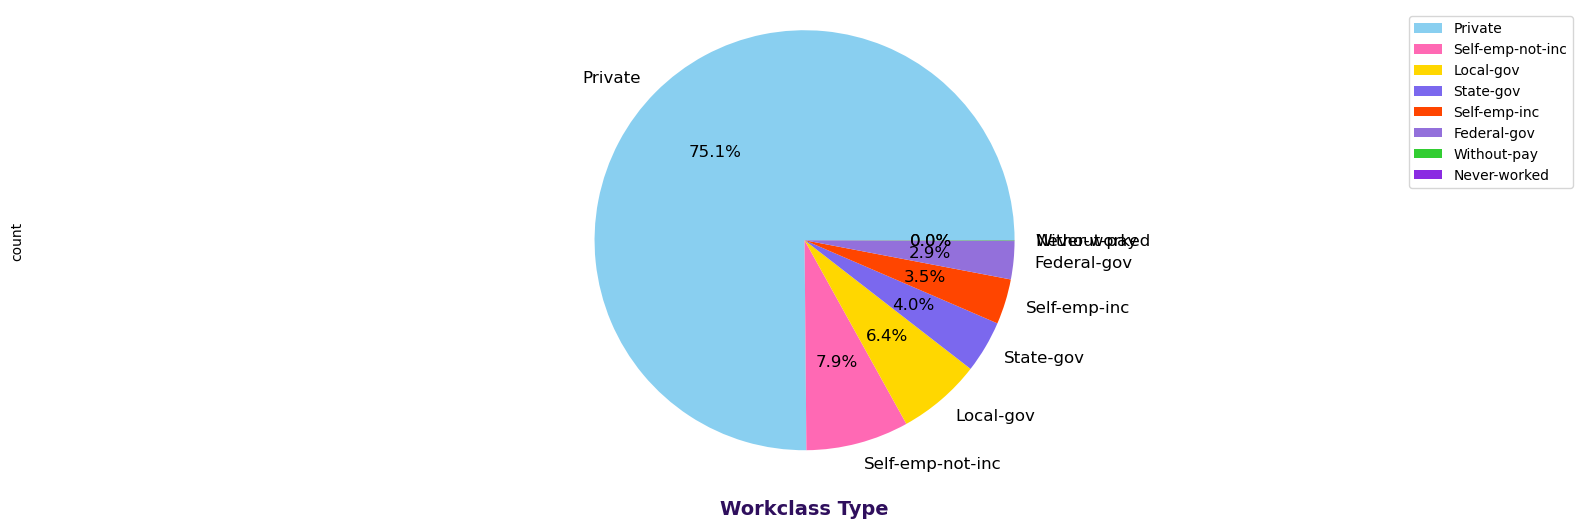

In [45]:
# workclass rate

plt.figure(figsize = (20, 6))

counts = df["workclass"].value_counts()
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Workclass Type', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

### *Age*

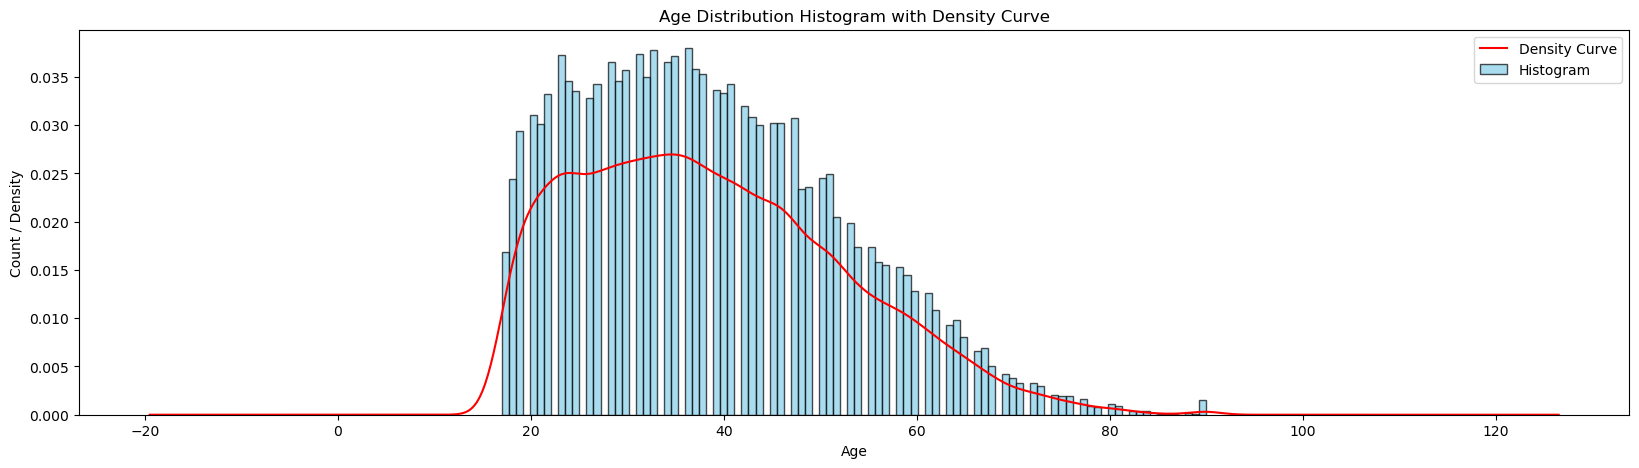

In [46]:
# Age distribution histogram

fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['age'], bins = 100, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

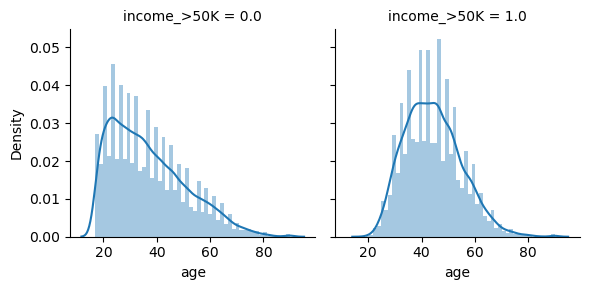

In [47]:
# Explore Age vs Income

grid = sns.FacetGrid(df, col='income_>50K')
grid = grid.map(sns.distplot, "age")

### *Capital-gain & loss*

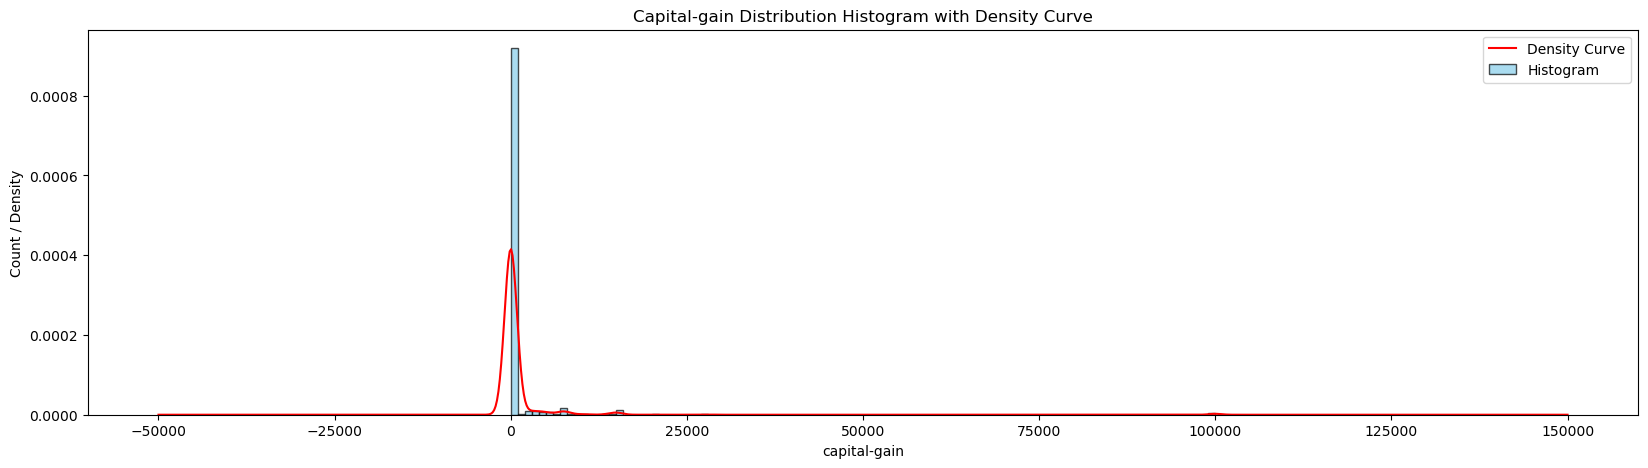

In [48]:
# Capital-gain distribution histogram

fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['capital-gain'], bins = 100, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['capital-gain'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('capital-gain')
ax.set_ylabel('Count / Density')
ax.set_title('Capital-gain Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

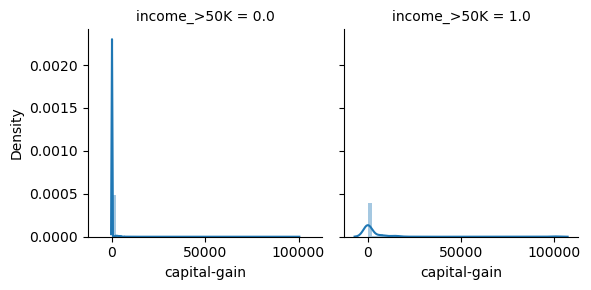

In [49]:
# Explore capital_gain vs Income

grid = sns.FacetGrid(df, col='income_>50K')
grid = grid.map(sns.distplot, "capital-gain")

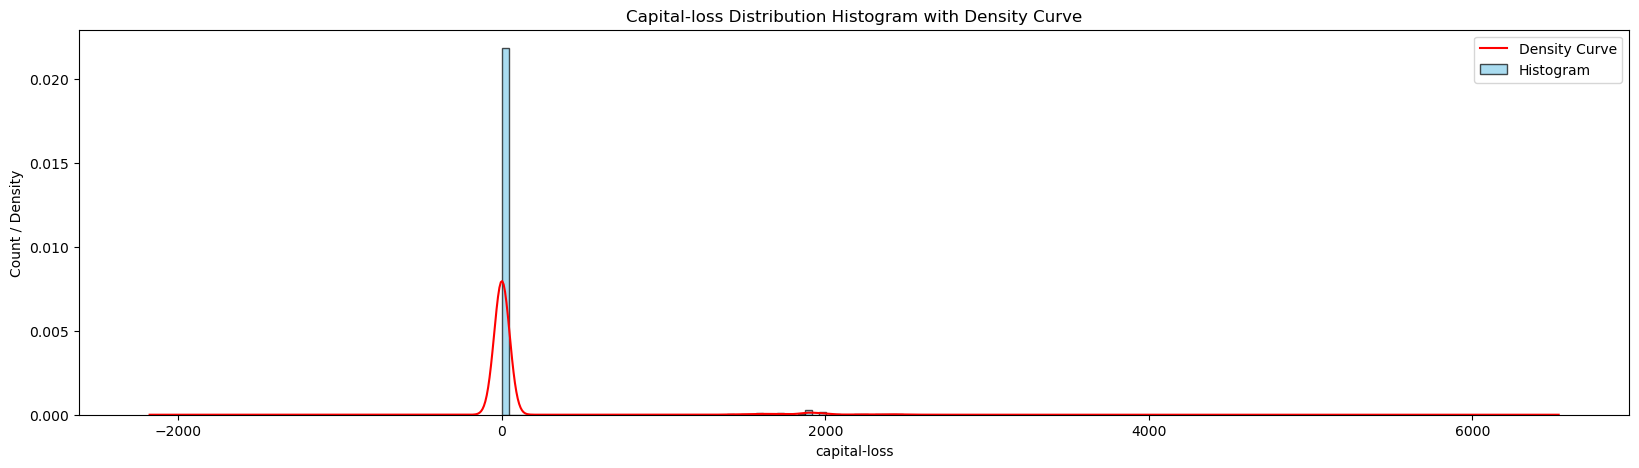

In [50]:
# Capital-loss distribution histogram

fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['capital-loss'], bins = 100, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['capital-loss'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('capital-loss')
ax.set_ylabel('Count / Density')
ax.set_title('Capital-loss Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

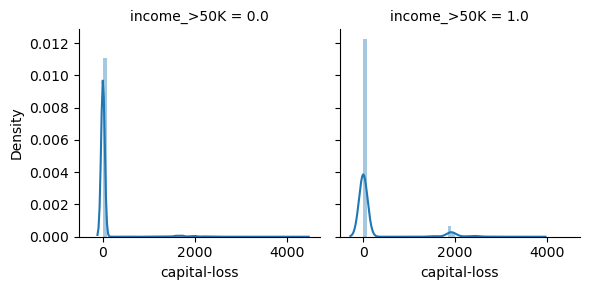

In [51]:
# Explore capital_loss vs Income

grid = sns.FacetGrid(df, col='income_>50K')
grid = grid.map(sns.distplot, "capital-loss")

### *Educational-num*

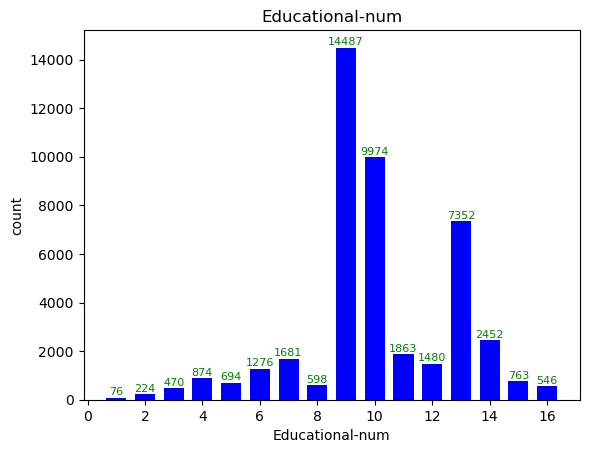

In [52]:
# Educational-num count graph

count_by_educational_num = df['educational-num'].value_counts()

plt.bar(count_by_educational_num.index, count_by_educational_num.values, width=0.7, color='blue')
plt.title('Educational-num')
plt.xlabel('Educational-num')
plt.ylabel('count')
for idx, val in count_by_educational_num.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points',
                 fontsize=8, ha='center', color='green')
plt.show()

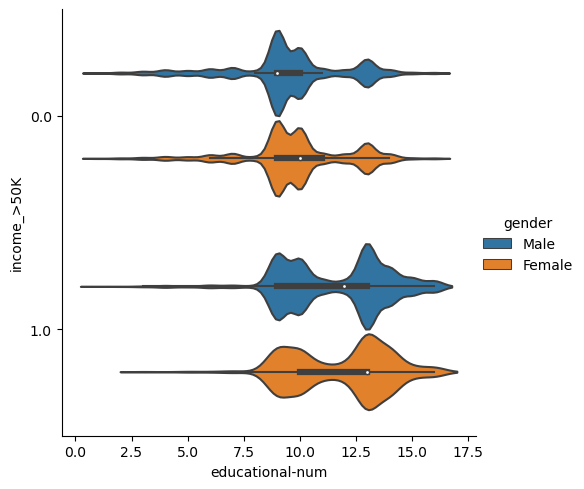

In [53]:
sns.catplot(x="educational-num", y="income_>50K", hue='gender', data=df, kind="violin", orient='h')

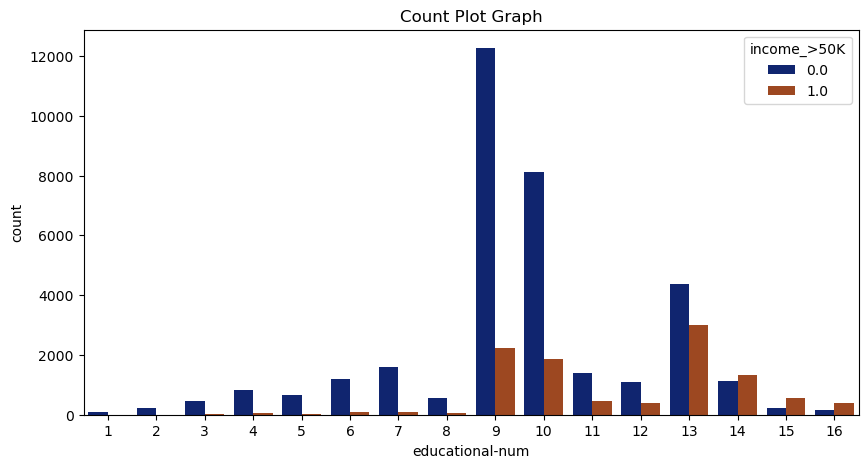

In [54]:
plt.figure(figsize=(10,5))
plt.title('Count Plot Graph')

sns.countplot(x='educational-num',data=df,hue='income_>50K',palette='dark')
plt.show()

### *Hours-per-week*

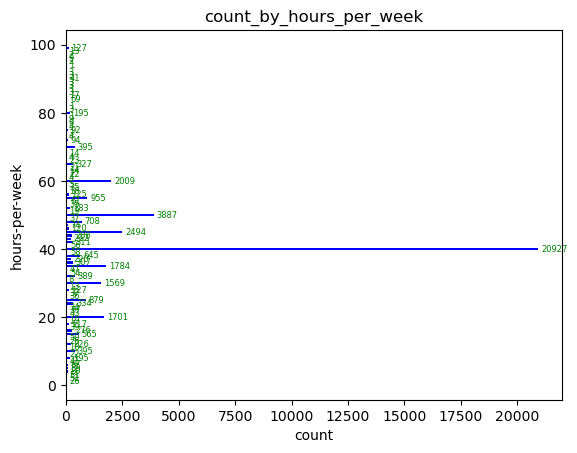

In [55]:
# Hours-per-week count graph

count_by_hours_per_week = df['hours-per-week'].value_counts()

plt.barh(count_by_hours_per_week.index, count_by_hours_per_week.values, height=0.7, color='blue')
plt.title('count_by_hours_per_week')
plt.xlabel('count')
plt.ylabel('hours-per-week')
for idx, val in count_by_hours_per_week.items():
    plt.annotate(val, (val, idx), xytext=(2, 0), textcoords='offset points',
                 fontsize=6, va='center', color='green')
plt.show()

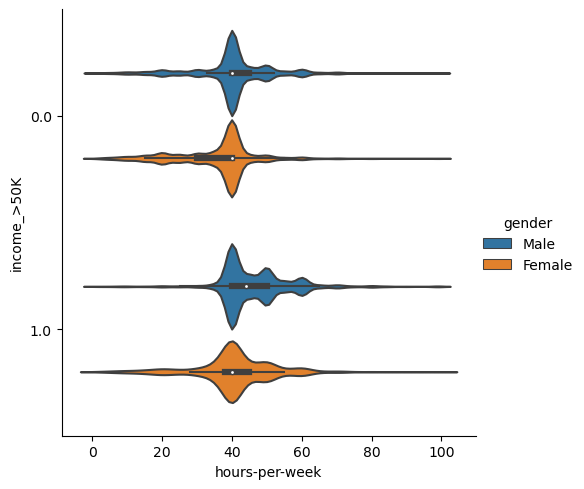

In [56]:
sns.catplot(x="hours-per-week", y="income_>50K", hue='gender', data=df, kind="violin", orient='h')

### *기본적인 EDA를 통해 발견한 사실*

In [57]:
# 주로 백인 미국인을 대상으로 한 dataset, 주로 Private한 고용형태,
# 50K 넘게 버는 사람은 주로 30~40대, 평균적으로 주 당 40시간 근무하며,
# 받은 교육의 수가 그렇지 않은 사람에 비해 대략 1.5배 정도 많다는 것을 알 수 있다.

### *추가적인 EDA*

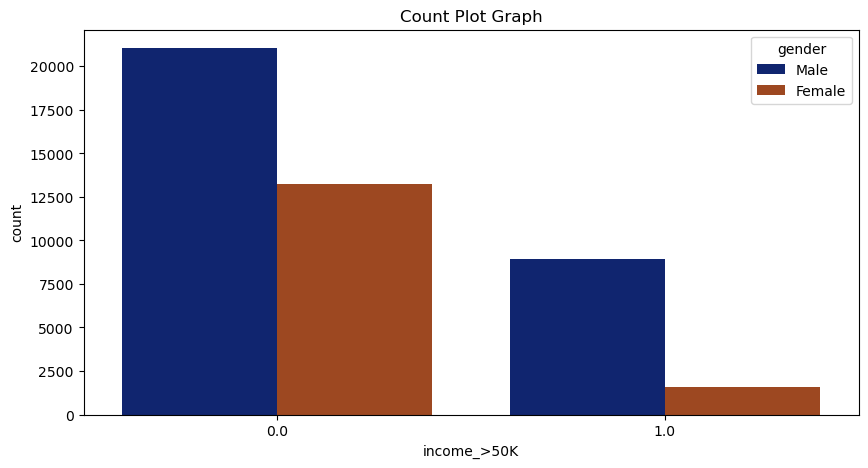

In [58]:
# 성별에 따른 소득 비교

plt.figure(figsize=(10,5))
plt.title('Count Plot Graph')

sns.countplot(x='income_>50K', data=df, hue='gender', palette='dark')
plt.show()

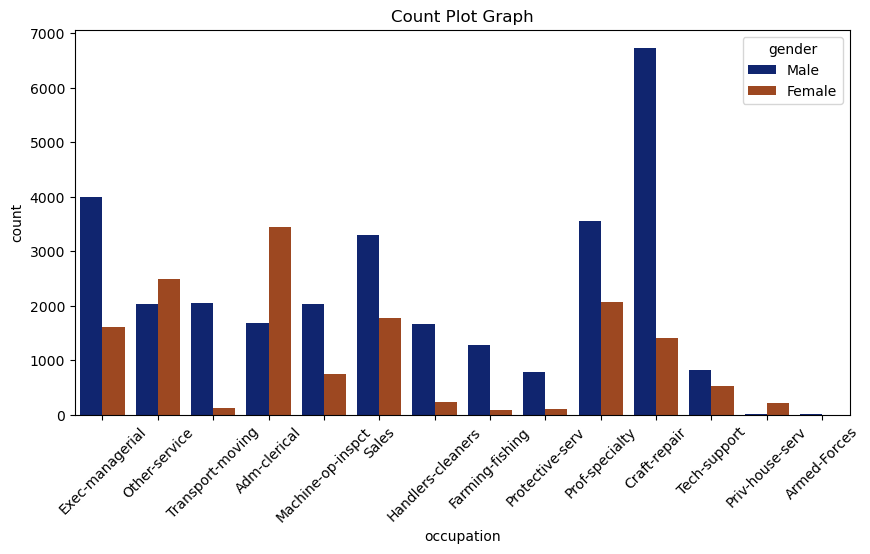

In [59]:
# 성별에 따른 직업 비교

plt.figure(figsize=(10,5))
plt.title('Count Plot Graph')

sns.countplot(x='occupation', data=df, hue='gender', palette='dark')
plt.xticks(rotation=45)
plt.show()

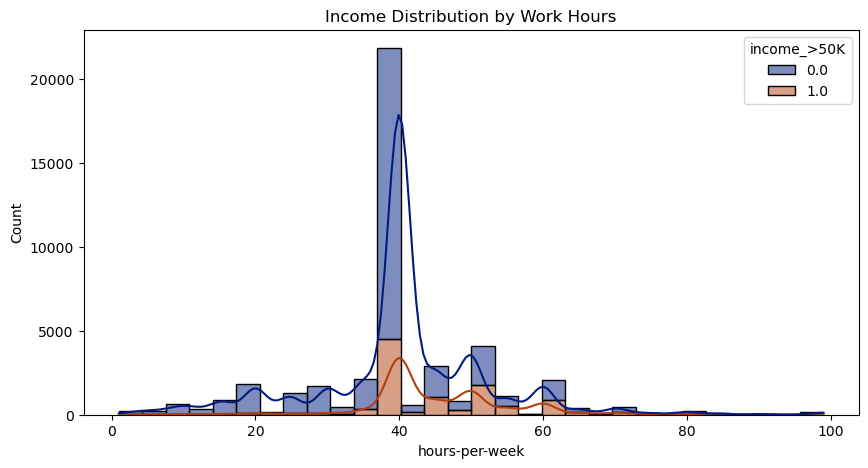

In [60]:
# 업무시간에 따른 소득 비교

plt.figure(figsize=(10,5))
plt.title('Hist Plot Graph')

sns.histplot(x='hours-per-week', hue='income_>50K', data=df, kde=True, multiple='stack', bins=30, palette='dark')
plt.title('Income Distribution by Work Hours')
plt.show()


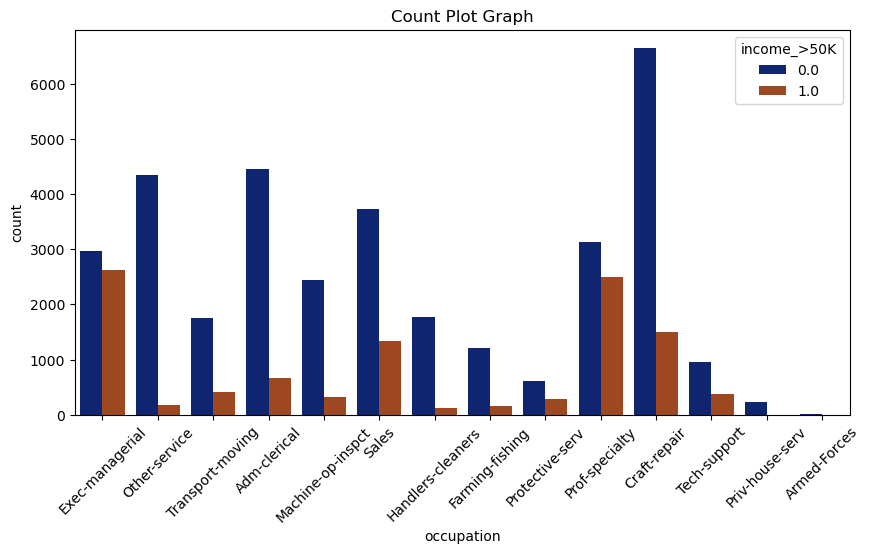

In [61]:
# 직업군에 따른 소득 비교

plt.figure(figsize=(10,5))
plt.title('Count Plot Graph')

sns.countplot(x='occupation', data=df, hue='income_>50K', palette='dark')
plt.xticks(rotation=45)
plt.show()

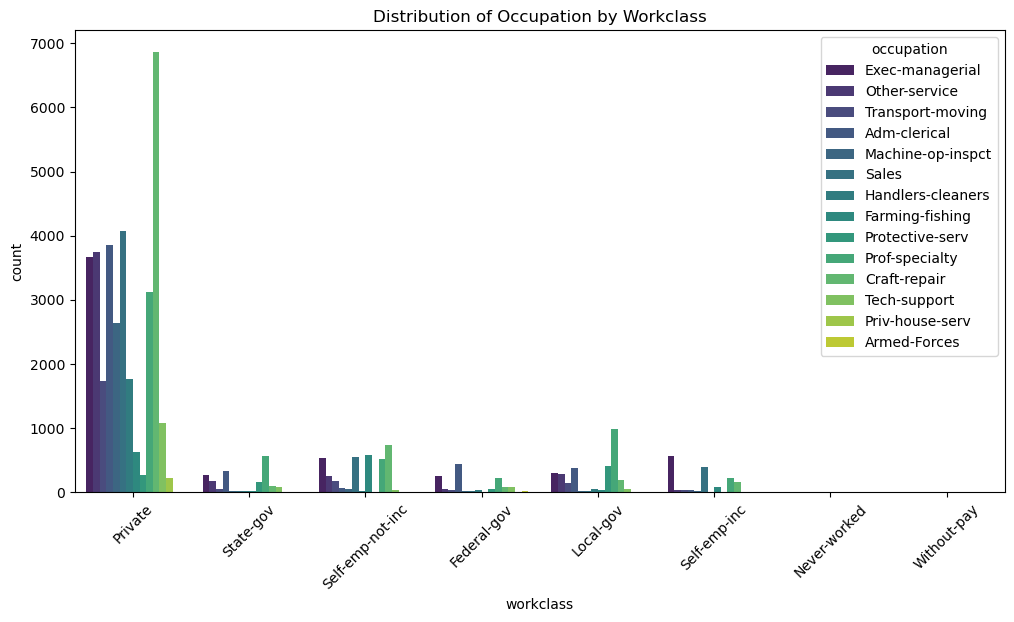

In [62]:
# 직업군에 따른 고용형태 비교

plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', data=df, hue='occupation', palette='viridis')
plt.title('Distribution of Occupation by Workclass')
plt.xticks(rotation=45)
plt.show()

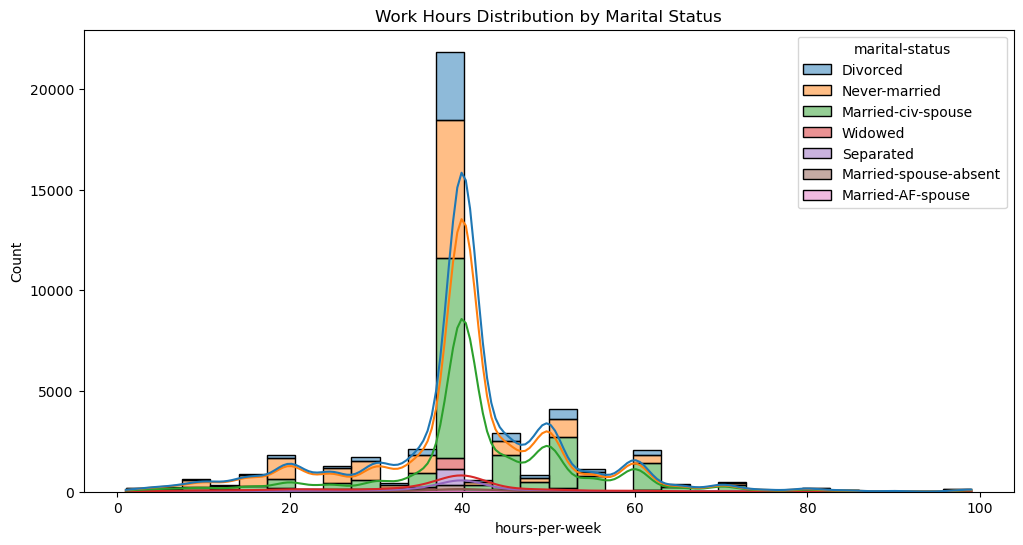

In [63]:
# 결혼여부에 따른 업무시간 비교

plt.figure(figsize=(12, 6))
sns.histplot(x='hours-per-week', hue='marital-status', multiple='stack', data=df, kde=True, bins=30)
plt.title('Work Hours Distribution by Marital Status')
plt.show()

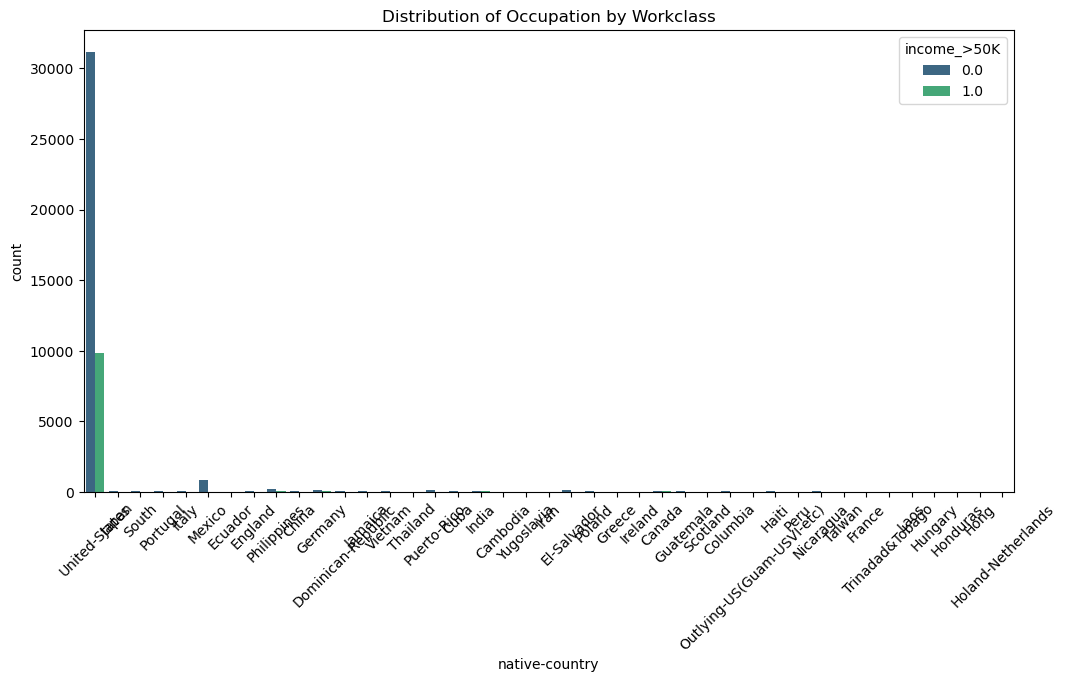

In [64]:
# 국적에 따른 소득 비교

plt.figure(figsize=(12, 6))
sns.countplot(x='native-country', data=df, hue='income_>50K', palette='viridis')
plt.title('Distribution of Occupation by Workclass')
plt.xticks(rotation=45)
plt.show()

### *추가적인 EDA를 통해 발견한 사실*

In [65]:
### 성별에 따른 소득 비교 
# 50K 넘는 사람 중 남성의 비율이 더 높다,

### 성별에 따른 직업 비교
# 대부분의 직업에서 남성의 비율이 높음을 보이고 그 중 공예 및 수리부분에서 가장 많은 차이를 보였다. 
# 반면 행정 및 사무직부분에서는 여성의 비율이 더 높게 나타났다.

### 업무시간에 따른 소득 비교
# 50K를 넘게 벌든 아니든 주 당 40시간 근무하는 사람이 가장 많고, 
# 50K 넘는 사람일수록 주 당 40시간 이상 일할 확률이 높다.

### 직업군에 따른 소득 비교 
# 주로 경영진(Exec-managerial)이나 의사,변호사(Prof-specialty)와 같은 직업에서 높은 소득을 보였다.

### 직업군에 따른 고용형태 비교
# 개인 기업에서 일을 하는 사람이 가장 많고, 그 중에서도 기술 지원 관련 일을 하는 사람이 가장 많았다.

### 결혼여부에 따른 업무시간 비교
# 배우자가 있는 결혼한 사람일수록 평균인 40시간보다 업무 시간이 길었다.

### 국적에 따른 소득 비교
# 주로 미국인을 대상으로 한 데이터였고, 
# 미국인 중 약 25%정도만이 50K보다 많은 소득을 얻었다는 사실을 알 수 있다.

### *Make new dataset by groupby* 

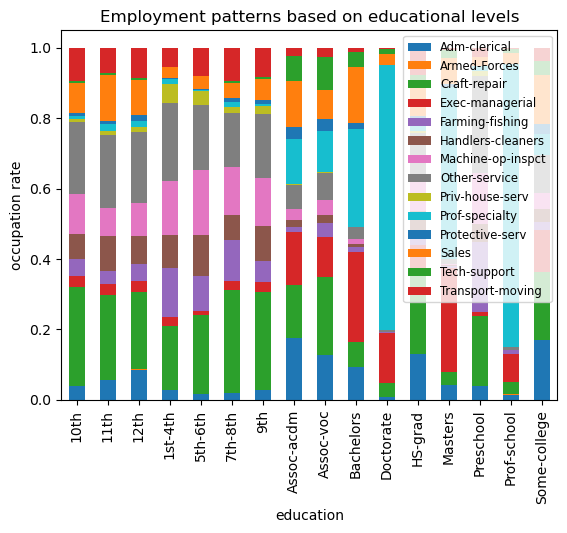

In [66]:
# 교육 수준에 따른 직업의 비율

eo = df.groupby('education')['occupation'].value_counts(normalize=True).unstack()

ax = eo.plot(kind='bar', stacked=True)
ax.legend(fontsize='small', loc='upper right')
plt.title('Employment patterns based on educational levels')
plt.xlabel('education')
plt.ylabel('occupation rate')
plt.show()

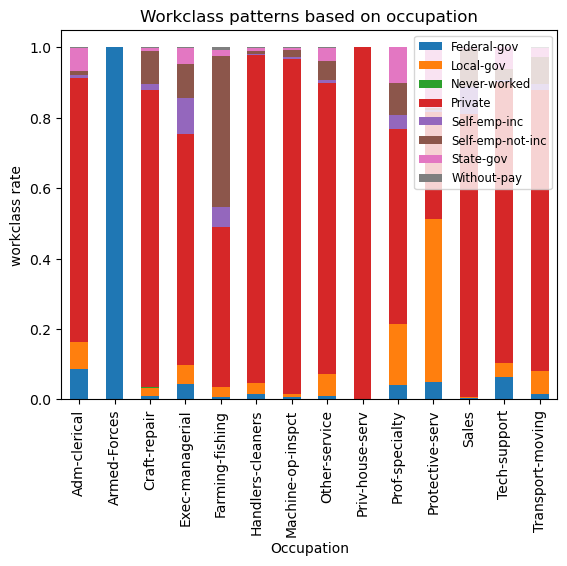

In [67]:
# 직업에 따른 고용형태의 비율

eo = df.groupby('occupation')['workclass'].value_counts(normalize=True).unstack()

ax = eo.plot(kind='bar', stacked=True)
ax.legend(fontsize='small', loc='upper right')
plt.title('Workclass patterns based on occupation')
plt.xlabel('Occupation')
plt.ylabel('workclass rate')
plt.show()

## *Data Preprocessing*

### *Label Encoding*

In [68]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

for column in df_columns:
    df[column] = le.fit_transform(df[column])
    
df

age  workclass  fnlwgt  education  educational-num  marital-status  \
0     67          3  366425         10               16               0   
1     17          3  244602          2                8               4   
2     31          3  174201          9               13               2   
3     58          6  110199          5                4               2   
4     25          6  149248         15               10               4   
..   ...        ...     ...        ...              ...             ...   
894   27          3  302406         12               14               2   
895   17          3  218124          1                7               4   
896   24          3  127139         15               10               4   
897   35          3  132879         15               10               2   
898   37          1   44694         12               14               2   

     occupation  relationship  race  gender  capital-gain  capital-loss  \
0             3             1     4       1         99999             0   
1             7             3     4       1             0             0   
2             3             0     4       1             0             0   
3            13             0     4       1             0             0   
4             7             1     2       1             0             0   
..          ...           ...   ...     ...           ...           ...   
894           9             0     4       1             0             0   
895          11             3     4       0             0             0   
896           0             3     4       0             0             0   
897          12             0     4       1             0             0   
898           9             5     4       0             0             0   

     hours-per-week  native-country  income_>50K  
0                60              38          1.0  
1                15              38          0.0  
2                40              38          1.0  
3                40              38          0.0  
4                40              38          0.0  
..              ...             ...          ...  
894              55              38          0.0  
895              20              38          0.0  
896              40              38          0.0  
897              40              38          0.0  
898              45              38          0.0  

[44810 rows x 15 columns]

### *Pairplot*

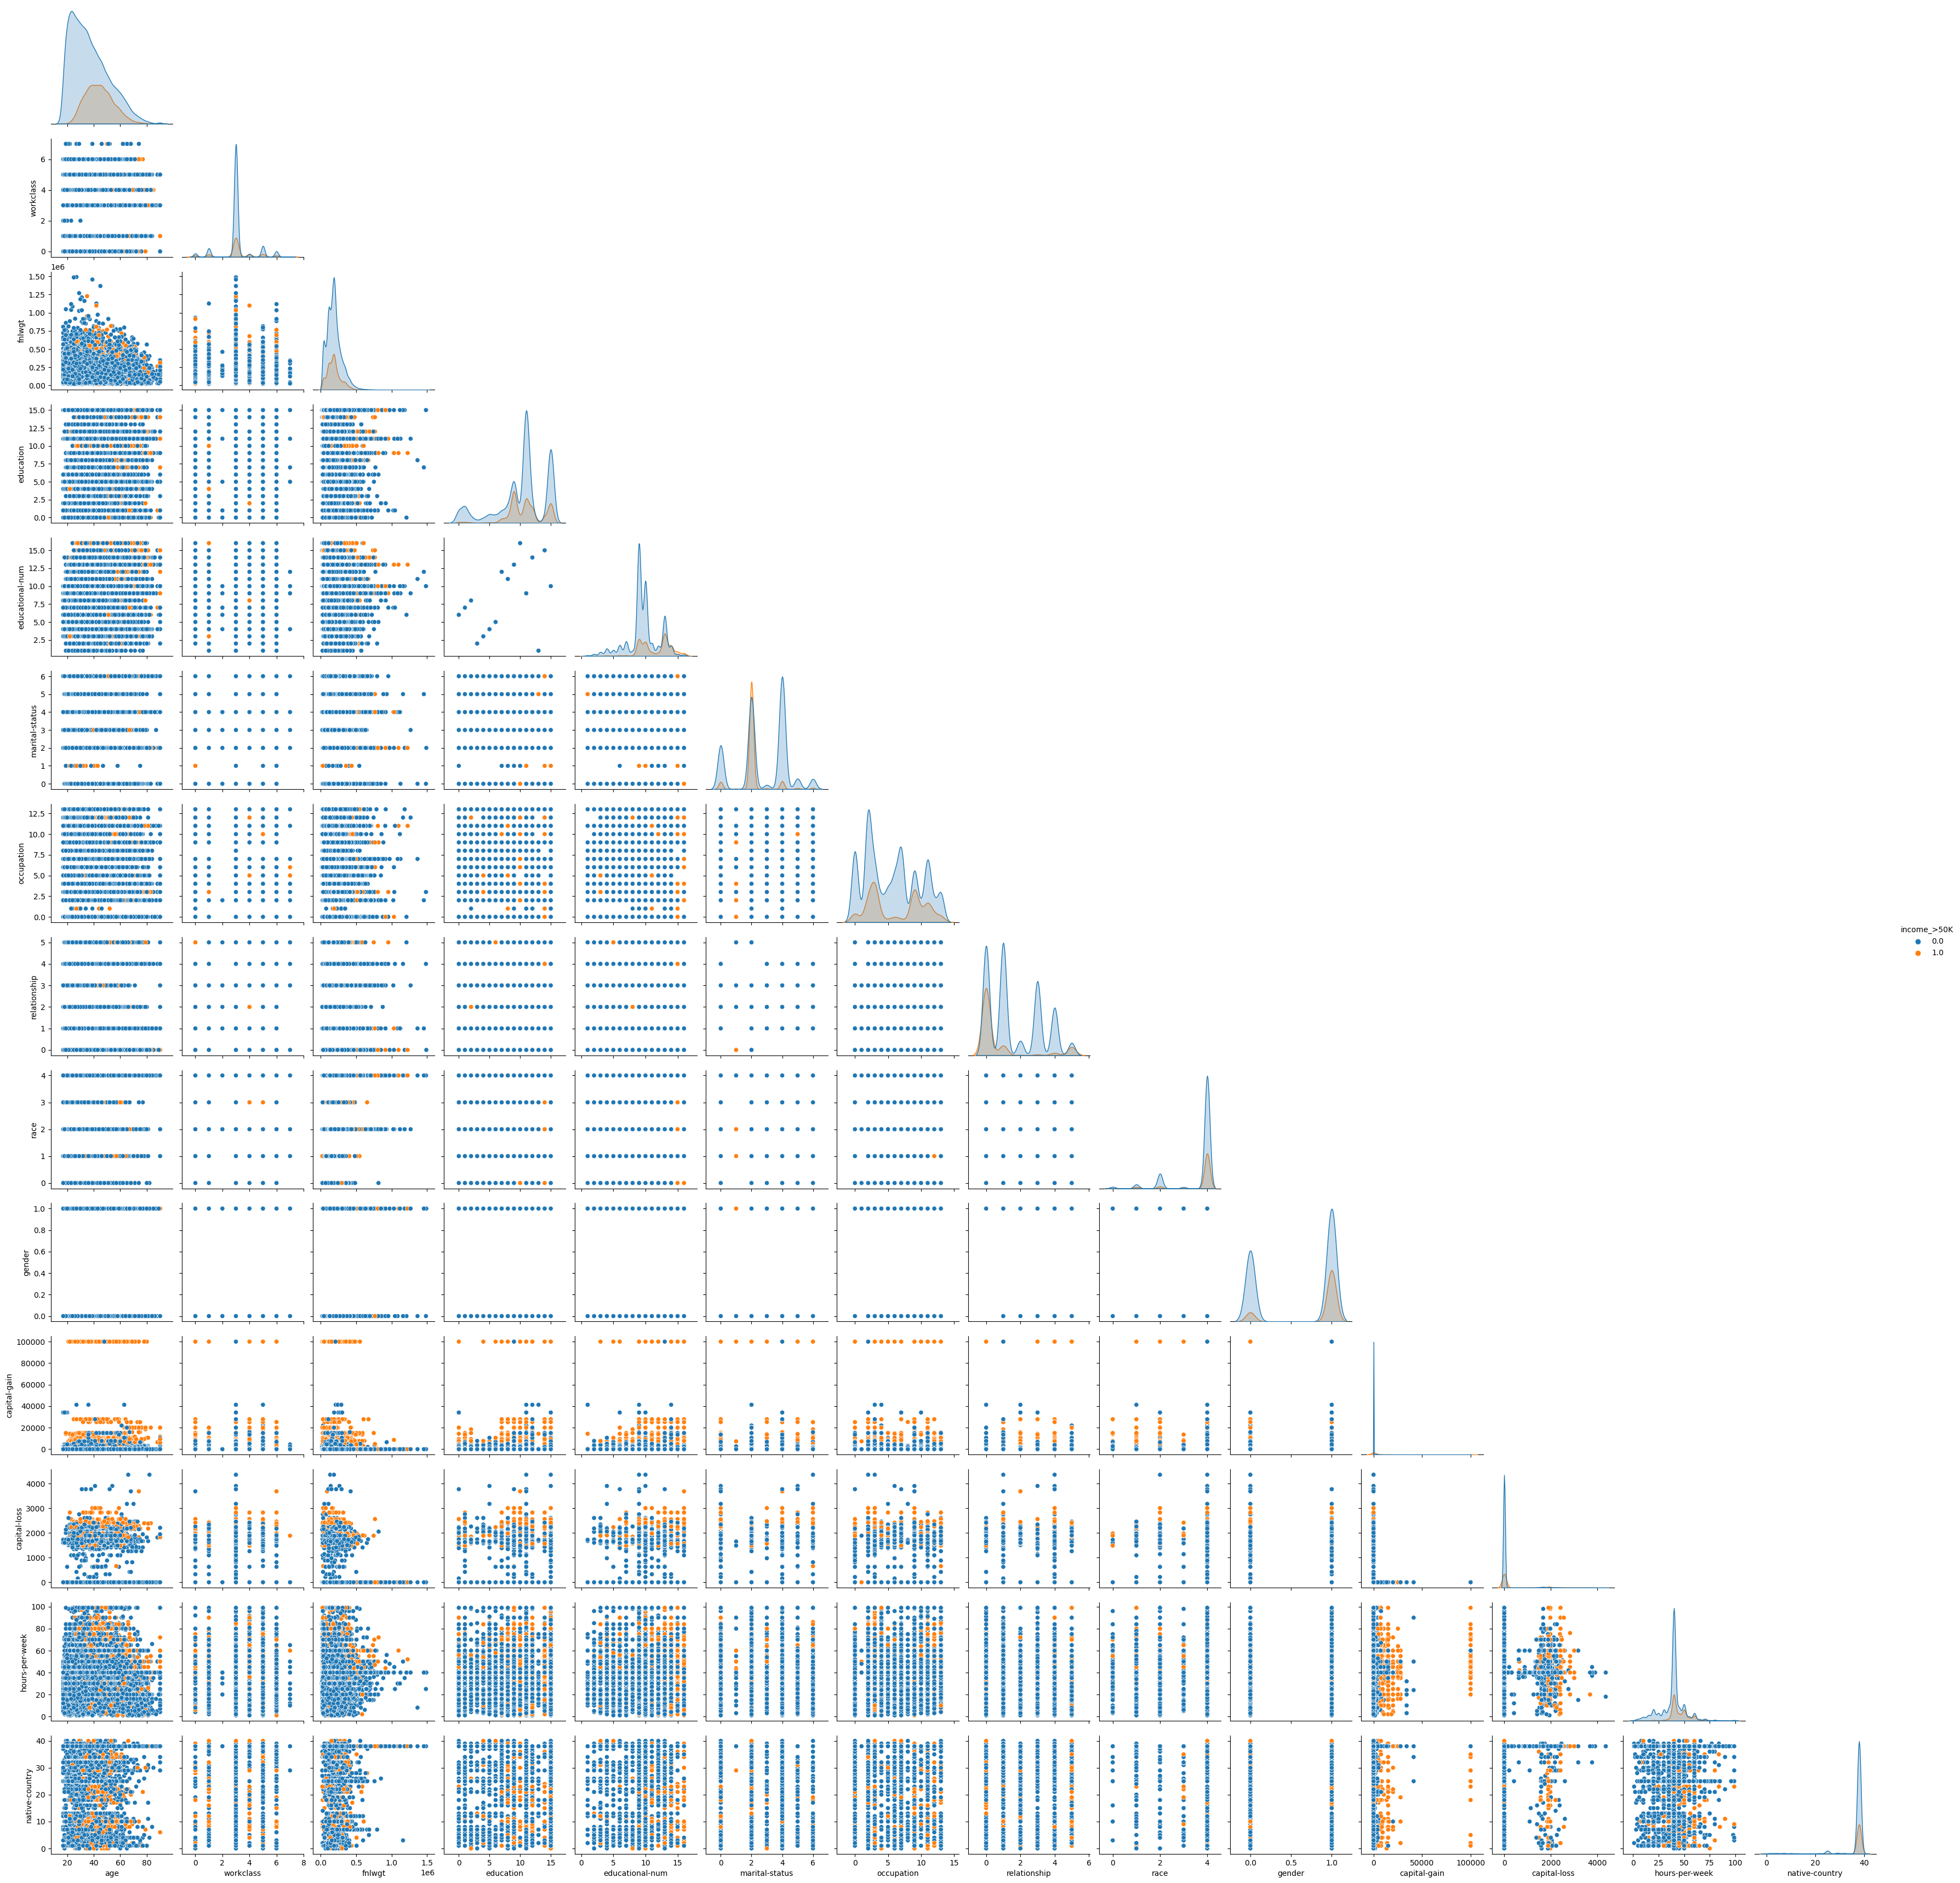

In [70]:
sns.pairplot(df,hue='income_>50K',corner=True)

### *Heatmap*

<Axes: title={'center': 'Heat Map Graph'}>

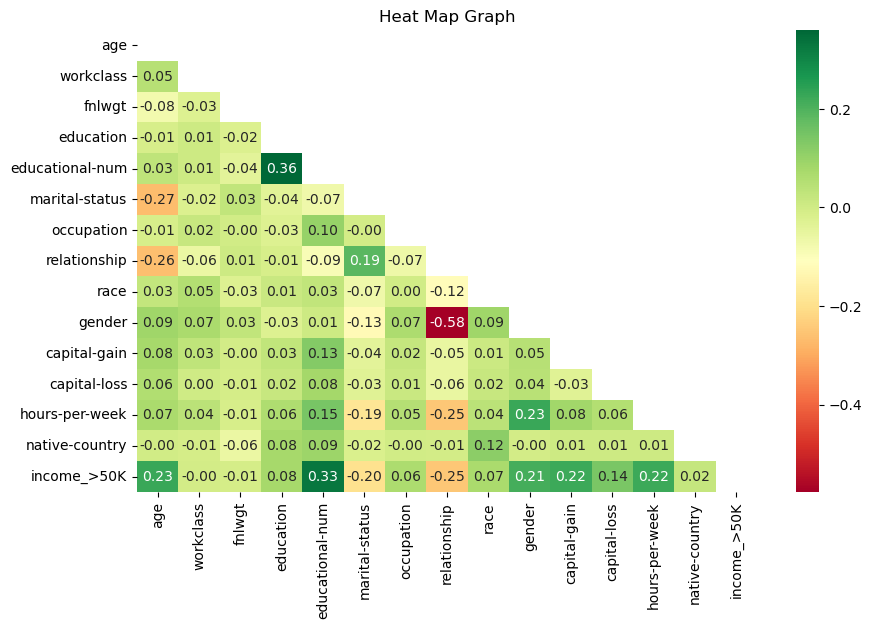

In [71]:
plt.figure(figsize=(10,6))
plt.title('Heat Map Graph')

correlation_matrix = df.corr()
upp_mat = np.triu(correlation_matrix)
annot_kws = {"size": 10}
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', mask=upp_mat, fmt=".2f", annot_kws=annot_kws)

## *Clustering*

### *KMeans*

In [72]:
df_modified = df.drop('income_>50K', axis=1)

In [73]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2)
kmeans.fit(df_modified)

print(f'cluster{kmeans.labels_}')
print(f'중심점: {kmeans.cluster_centers_}')
#print(kmeans.n_iter_)
print(f'응집도: {kmeans.inertia_}')
kmeans.score(df_modified)

cluster[1 1 0 ... 0 0 0]
중심점: [[3.91854510e+01 3.11029345e+00 1.41651261e+05 1.03239135e+01
  1.01369545e+01 2.59679706e+00 5.75042977e+00 1.44518503e+00
  3.68682330e+00 6.58593962e-01 1.11115807e+03 9.07301324e+01
  4.04321863e+01 3.66155261e+01]
 [3.70309791e+01 3.06444692e+00 3.26649348e+05 1.01781515e+01
  9.90792071e+00 2.67501931e+00 5.78537716e+00 1.43310735e+00
  3.61366172e+00 6.98103493e-01 1.01967159e+03 8.33551017e+01
  4.04057324e+01 3.58835493e+01]]
응집도: 209177025811938.03


-209177025811938.03

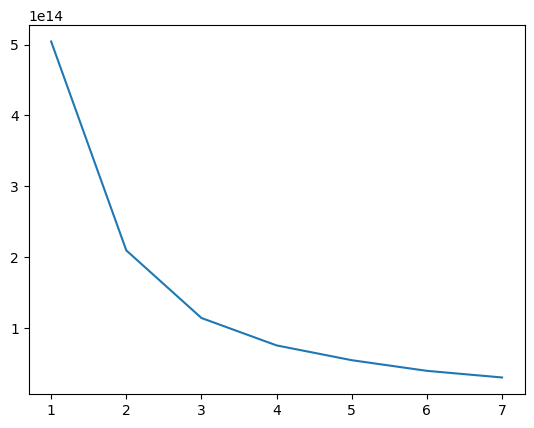

In [74]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

temp=[]
for i in range(1,8):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df_modified)
  temp.append(kmeans.inertia_)
plt.plot(range(1,8),temp)

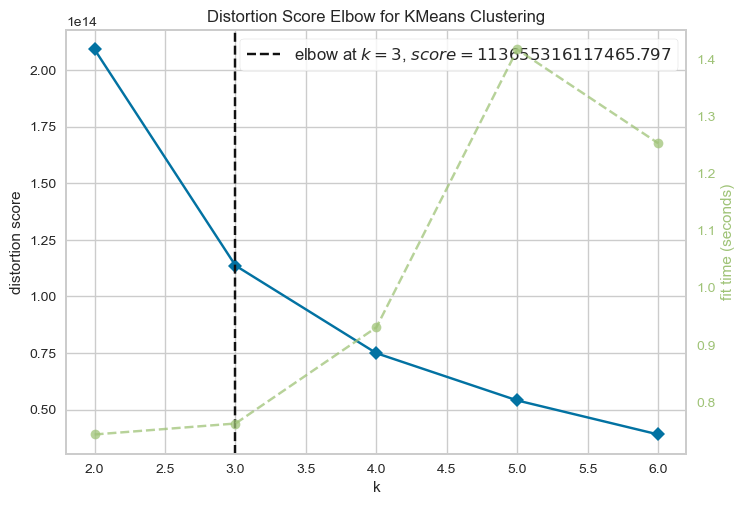

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(), k=(2,7))
visualizer.fit(df_modified) 
visualizer.show() 

### *Hierarchical Clustering*

Text(0, 0.5, 'distance')

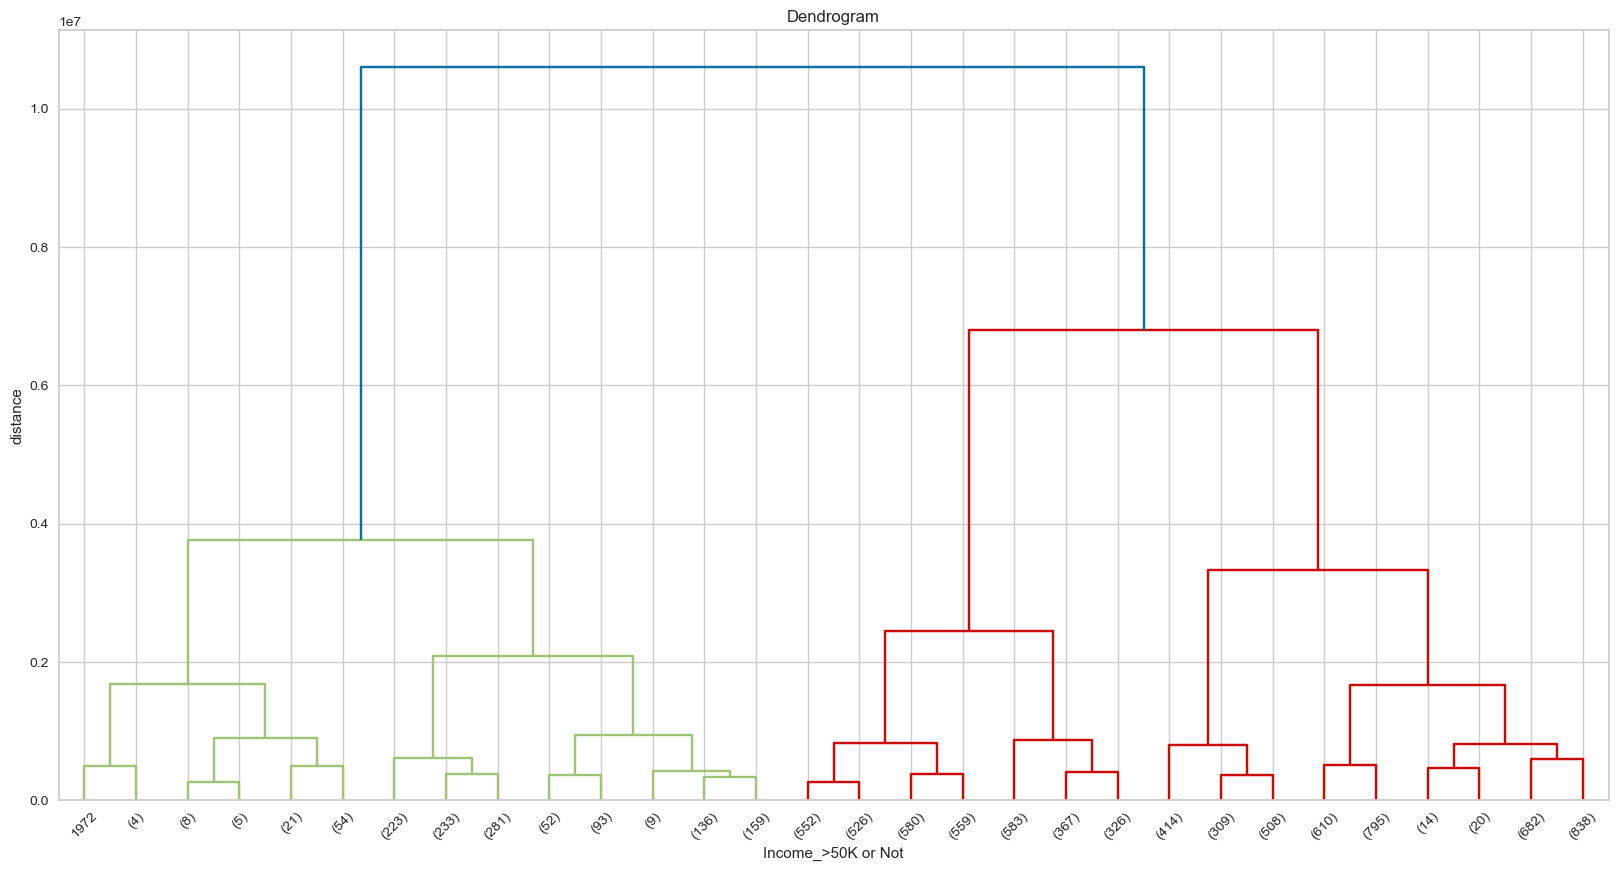

In [76]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))

df_modified_sample = df_modified.sample(frac=0.2, random_state=42)
cluster=linkage(df_modified_sample, method='ward')
dendrogram(cluster, truncate_mode='lastp', p=30)

plt.title('Dendrogram')
plt.xlabel('Income_>50K or Not')
plt.ylabel('distance')

In [77]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_modified_sample)

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

## *Data Spliting*

In [78]:
X=df.drop('income_>50K', axis=1)
y=df['income_>50K']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(35848, 14)
(8962, 14)


## *ML, Classification*

In [80]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.8072974782414639
[[6896   15]
 [1712  339]]


In [81]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8178977906717251
[[6050  861]
 [ 771 1280]]


In [82]:
# RF

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print ("\n--- Random Forest ---")
print(accuracy_score(y_test,pred_rf))
print (confusion_matrix(y_test, pred_rf))


--- Random Forest ---
0.8543851818790449
[[6403  508]
 [ 797 1254]]


In [83]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7959160901584468
[[6534  377]
 [1452  599]]


In [84]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

print(f'클래스의 종류:{clf_knn.classes_}')
print(f'거리계산방법:{clf_knn.effective_metric_}')
print(f'훈련데이터 샘플 수:{clf_knn.n_samples_fit_}')

pred_knn = clf_knn.predict(X_test)

print ("\n--- K-Nearest-Neighbors Classifier ---")
print (accuracy_score(y_test, pred_knn))
print (confusion_matrix(y_test, pred_knn))

클래스의 종류:[0. 1.]
거리계산방법:euclidean
훈련데이터 샘플 수:35848

--- K-Nearest-Neighbors Classifier ---
0.7855389422004017
[[6375  536]
 [1386  665]]


In [85]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(clf_knn,X_train,y_train,cv=4, scoring='accuracy')

for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 0.778620843561705
2번째 정확도: 0.7757197054228967
3번째 정확도: 0.7761660343673287
4번째 정확도: 0.7770586922561928


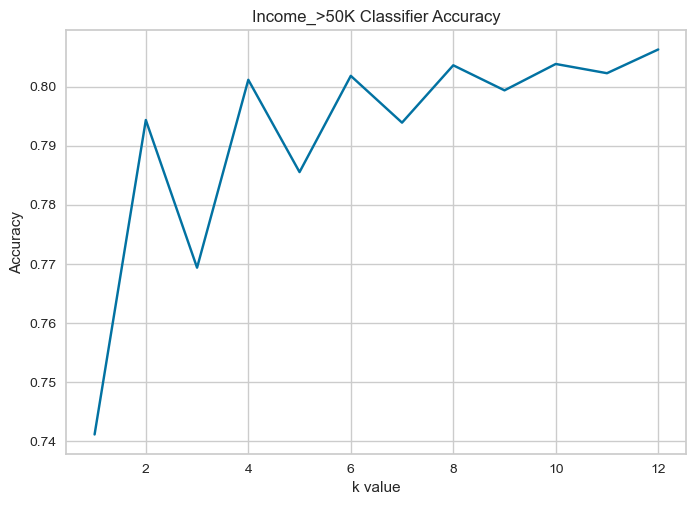

In [86]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 13)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Income_>50K Classifier Accuracy")
plt.show()

In [87]:
# Classification Result

# Support Vector Machine
accuracy_svm = accuracy_score(y_test, pred_svm) * 100
print('SVM Accuracy: {:.2f}%'.format(accuracy_svm))

# Decision Tree
accuracy_dt = accuracy_score(y_test, pred_dt) * 100
print('DT Accuracy: {:.2f}%'.format(accuracy_dt))

# Random Forest
accuracy_rf = accuracy_score(y_test, pred_rf) * 100
print('RF Accuracy: {:.2f}%'.format(accuracy_rf))

# Logistic Regression
accuracy_lr = accuracy_score(y_test, pred_lr) * 100
print('LR Accuracy: {:.2f}%'.format(accuracy_lr))

# k-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, pred_knn) * 100
print('KNN Accuracy: {:.2f}%'.format(accuracy_knn))

SVM Accuracy: 80.73%
DT Accuracy: 81.79%
RF Accuracy: 85.44%
LR Accuracy: 79.59%
KNN Accuracy: 78.55%


### *Attempting to improve performance by removing outliers*

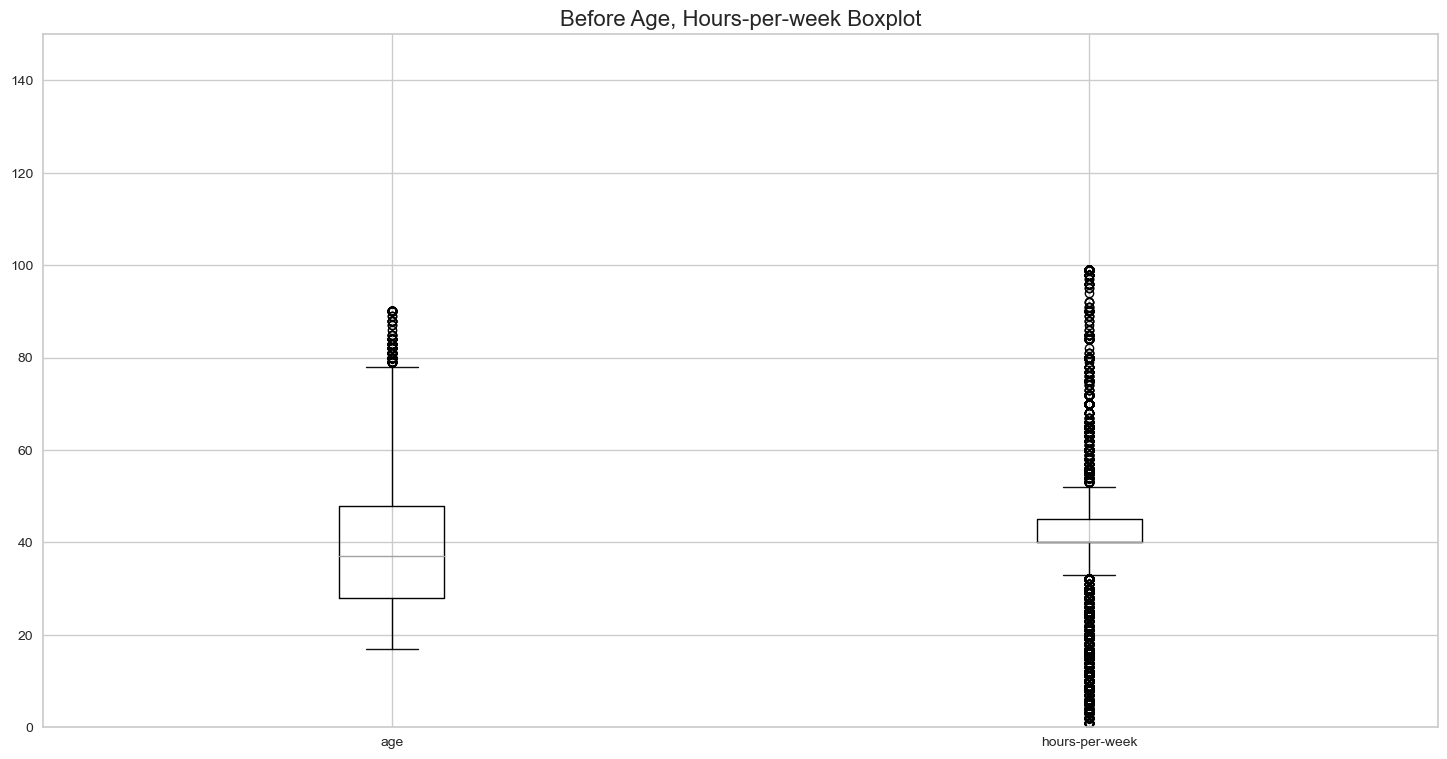

In [88]:
# Before

num_cols = ['age', 'hours-per-week']
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.ylim(0, 150)
plt.title("Before Age, Hours-per-week Boxplot", fontsize=16)
plt.show()

In [89]:
# hours-per-week 최소값, 최대값, 평균값, 최빈값

print("Min : ", df['hours-per-week'].min())
print("Max : ", df['hours-per-week'].max())
print("Mean : ", df['hours-per-week'].mean())
print("Mode : ", df['hours-per-week'].mode())

Min :  1
Max :  99
Mean :  40.425306851149294
Mode :  0    40
Name: hours-per-week, dtype: int64


In [90]:
# Remove hours-per-week outlier

df.drop(df[df['age'] > 75].index, inplace=True)
df.drop(df[df['hours-per-week'] < 35].index, inplace=True)
df.drop(df[df['hours-per-week'] > 45].index, inplace=True)

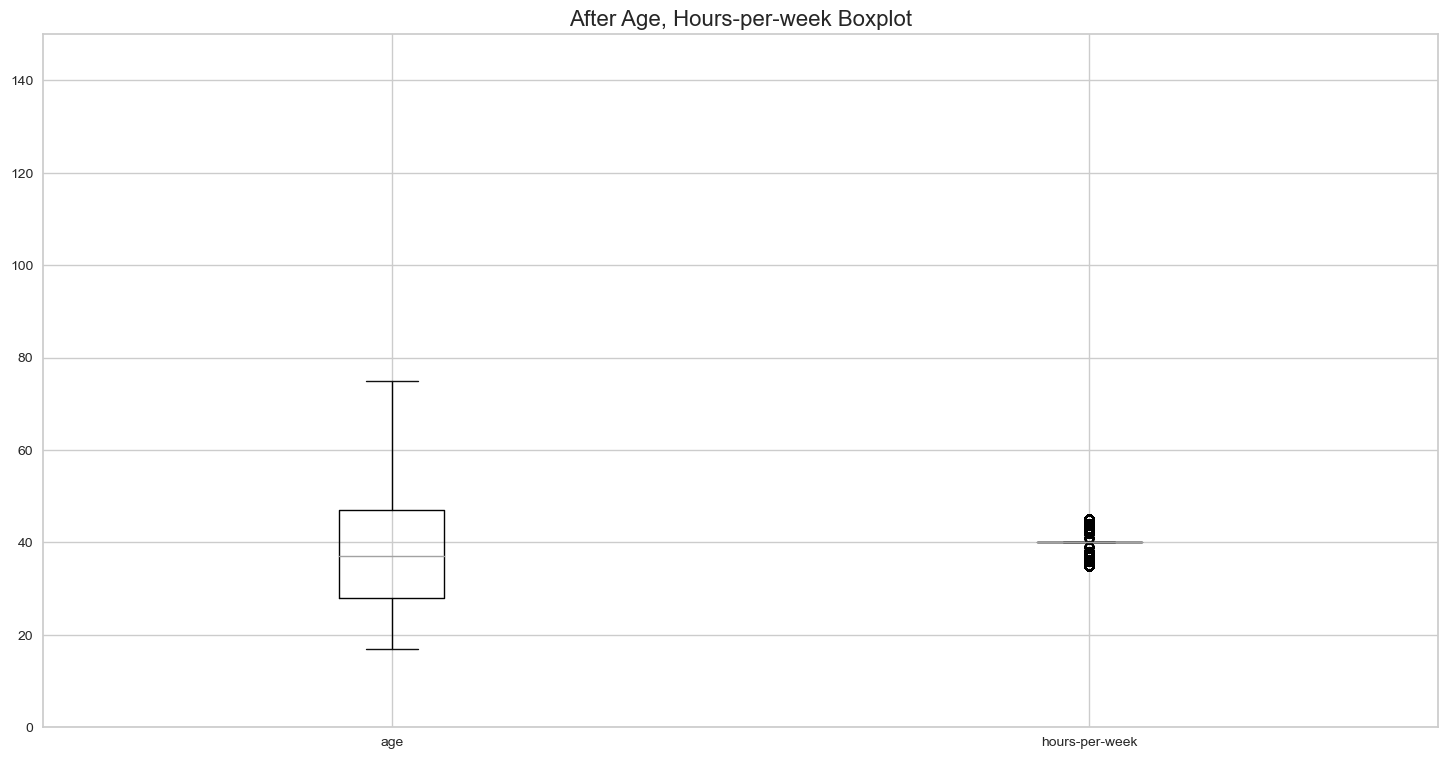

In [91]:
# After

num_cols = ['age', 'hours-per-week']
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.ylim(0, 150)
plt.title("After Age, Hours-per-week Boxplot", fontsize=16)
plt.show()

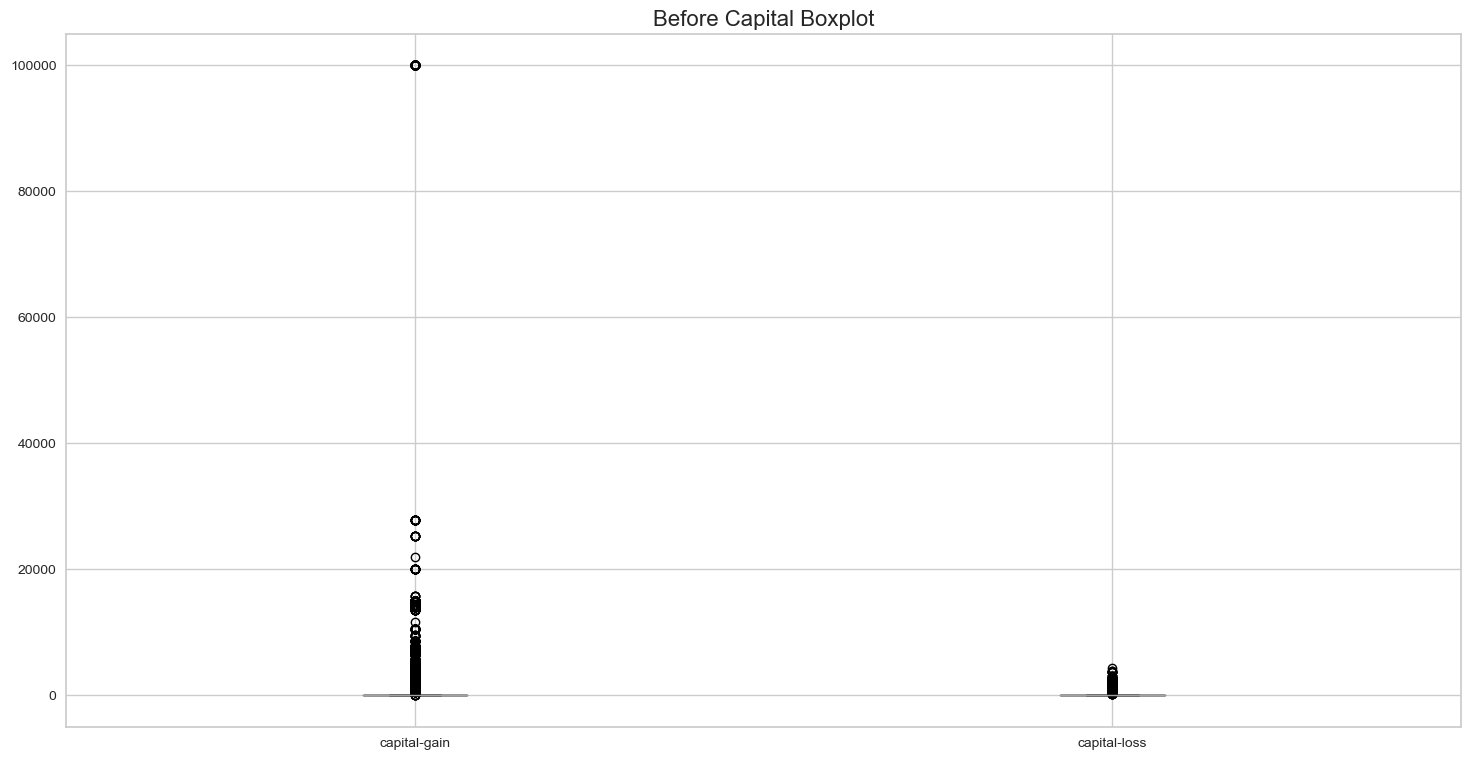

In [92]:
# Before

num_cols = ['capital-gain', 'capital-loss']
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Before Capital Boxplot", fontsize=16)
plt.show()

In [93]:
# Remove capital-gain & loss outlier

df.drop(df[df['capital-gain'] > 1000].index, inplace=True)
df.drop(df[df['capital-loss'] > 1000].index, inplace=True)

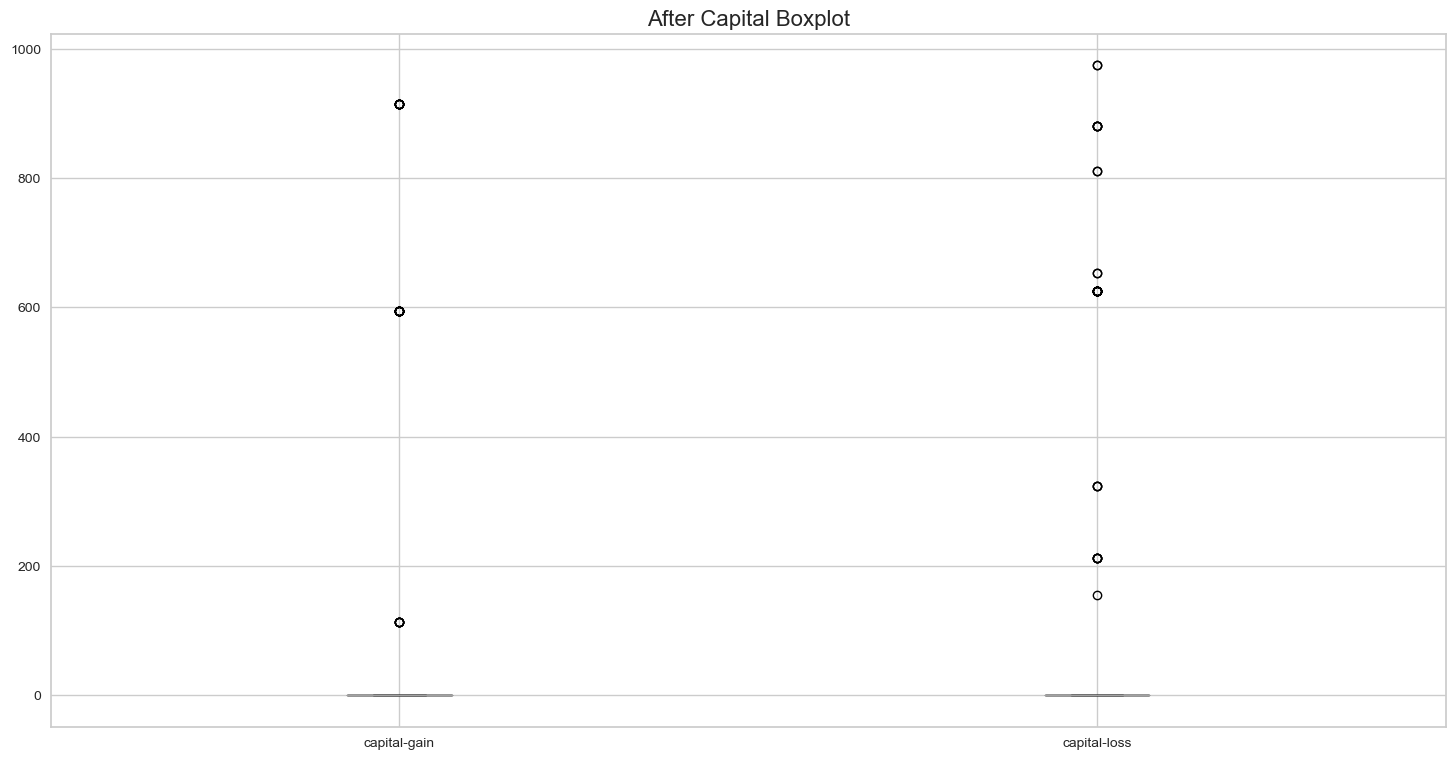

In [94]:
# After

num_cols = ['capital-gain', 'capital-loss']
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("After Capital Boxplot", fontsize=16)
plt.show()

In [95]:
X=df.drop('income_>50K', axis=1)
y=df['income_>50K']

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(18799, 14)
(4700, 14)


In [97]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.8253191489361702
[[3879    0]
 [ 821    0]]


In [98]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7972340425531915
[[3367  512]
 [ 441  380]]


In [99]:
# RF

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print ("\n--- Random Forest ---")
print(accuracy_score(y_test,pred_rf))
print (confusion_matrix(y_test, pred_rf))


--- Random Forest ---
0.845531914893617
[[3592  287]
 [ 439  382]]


In [100]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8202127659574469
[[3845   34]
 [ 811   10]]


In [101]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

print(f'클래스의 종류:{clf_knn.classes_}')
print(f'거리계산방법:{clf_knn.effective_metric_}')
print(f'훈련데이터 샘플 수:{clf_knn.n_samples_fit_}')

pred_knn = clf_knn.predict(X_test)

print ("\n--- K-Nearest-Neighbors Classifier ---")
print (accuracy_score(y_test, pred_knn))
print (confusion_matrix(y_test, pred_knn))

클래스의 종류:[0. 1.]
거리계산방법:euclidean
훈련데이터 샘플 수:18799

--- K-Nearest-Neighbors Classifier ---
0.8004255319148936
[[3695  184]
 [ 754   67]]


In [102]:
# Classification Result

# Support Vector Machine
accuracy_svm = accuracy_score(y_test, pred_svm) * 100
print('SVM Accuracy: {:.2f}%'.format(accuracy_svm))

# Decision Tree
accuracy_dt = accuracy_score(y_test, pred_dt) * 100
print('DT Accuracy: {:.2f}%'.format(accuracy_dt))

# Random Forest
accuracy_rf = accuracy_score(y_test, pred_rf) * 100
print('RF Accuracy: {:.2f}%'.format(accuracy_rf))

# Logistic Regression
accuracy_lr = accuracy_score(y_test, pred_lr) * 100
print('LR Accuracy: {:.2f}%'.format(accuracy_lr))

# k-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, pred_knn) * 100
print('KNN Accuracy: {:.2f}%'.format(accuracy_knn))

SVM Accuracy: 82.53%
DT Accuracy: 79.72%
RF Accuracy: 84.55%
LR Accuracy: 82.02%
KNN Accuracy: 80.04%


### *SVM : 2%, LR : 2.4%, KNN : 1.5% 증가, but 유의미한 차이는 없음.*

# *End of Term Project !*